In [1]:
from mave_calibration.main import prep_data, runFitIteration
import numpy as np
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm,trange
import joblib
import seaborn as sns

/home/dzeiberg/mave_calibration/mave_calibration/main.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
datafile = "/data/dzeiberg/mave_calibration/processed_datasets/Findlay_BRCA1_SGE_pipeline_B.json"

In [8]:
observations, sample_indicators, labels, bootstrap_indices = prep_data(datafile)

In [4]:
proportions = np.array([1,1/2, 1/4, 1/8,1/16,1/32])

In [5]:
def downsample(observations, sample_indicators, proportions):
    NSamples = sample_indicators.sum(0)
    downsampleNum = np.round(NSamples * proportions).astype(int)
    indices = np.concatenate([np.random.choice(np.where(sample_indicators[:,i])[0], size=downsampleNum[i], replace=False) for i in range(sample_indicators.shape[1])])
    downsampled_observations = observations[indices]
    downsampled_sample_indicators = sample_indicators[indices]
    return downsampled_observations, downsampled_sample_indicators, indices

In [28]:
fits,LLs = [],[]
NUM_FITS = 100
FITS_PER_ITER = 100
for proportion in tqdm(proportions,desc="Proportions"):
    fits_i = []
    lls_i = []
    for rep in trange(NUM_FITS,leave=False,desc=f"Proportion {proportion}"):
        X,S,indices = downsample(observations,sample_indicators,proportion)
        print(S.sum(0))
        fit_results = Parallel(n_jobs=FITS_PER_ITER)(delayed(runFitIteration)(X,S,) for i in range(FITS_PER_ITER))
        fit_results = sorted(fit_results, key=lambda x: x[1], reverse=True)
        fits_i.append(fit_results[0][0])
        lls_i.append(fit_results[0][1])
    fits.append(fits_i)
    LLs.append(lls_i)

Proportions:   0%|          | 0/6 [00:00<?, ?it/s]

Proportion 1.0:   0%|          | 0/100 [00:00<?, ?it/s]

[124  63 505 566]


EM Iteration:   1%|          | 67/10000 [00:01<02:43, 60.70it/s, likelihood=-0.530131]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:01<03:21, 49.27it/s, likelihood=-0.552744]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<07:40, 21.72it/s, likelihood=-0.532421]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:15, 73.43it/s, likelihood=-0.473808]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   0%|          | 42/10000 [00:00<02:26, 68.07it/s, likelihood=-0.487782]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:04, 79.93it/s, likelihood=-0.477579]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:04, 79.93it/s, likelihood=-0.477579]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:01<02:18, 71.49it/s, likelihood=-0.470943]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:32, 65.22it/s, likelihood=-0.463553]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:35, 63.84it/s, likelihood=-0.507754]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:00<02:04, 79.64it/s, likelihood=-0.534591]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[124  63 505 566]


EM Iteration:   0%|          | 1/10000 [00:00<08:13, 20.24it/s, likelihood=-0.510673]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:52, 57.84it/s, likelihood=-0.479506]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<02:13, 74.35it/s, likelihood=-0.510034]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:46, 59.72it/s, likelihood=-0.467055]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<01:59, 83.06it/s, likelihood=-0.521237]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:06, 78.77it/s, likelihood=-0.506286]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:10, 76.03it/s, likelihood=-0.463238]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:41, 61.83it/s, likelihood=-0.445788]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<02:07, 78.13it/s, likelihood=-0.491919]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM It

[124  63 505 566]


EM Iteration:   0%|          | 8/10000 [00:00<06:44, 24.68it/s, likelihood=-0.517941]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:00<02:12, 75.08it/s, likelihood=-0.476138]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<02:10, 76.40it/s, likelihood=-0.518201]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:29, 66.58it/s, likelihood=-0.544773]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   1%|          | 56/10000 [00:00<02:11, 75.40it/s, likelihood=-0.495756]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<02:34, 64.81it/s, likelihood=-0.521161]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:08, 77.40it/s, likelihood=-0.504245]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:01<02:26, 67.66it/s, likelihood=-0.516386]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 3/10000 [00:00<05:55, 28.11it/s, likelihood=-0.496908]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<02:10, 75.91it/s, likelihood=-0.527121]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:39, 62.45it/s, likelihood=-0.479429]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:10, 76.21it/s, likelihood=-0.505991]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   0%|          | 43/10000 [00:00<02:48, 59.18it/s, likelihood=-0.534800]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 11/10000 [00:00<02:36, 63.91it/s, likelihood=-0.482661]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 72/10000 [00:00<02:00, 82.26it/s, likelihood=-0.478777]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:01<02:17, 72.41it/s, likelihood=-0.465685]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 45/10000 [00:00<02:21, 70.59it/s, likelihood=-0.512652]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:17, 72.37it/s, likelihood=-0.512651]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:11, 76.00it/s, likelihood=-0.526183]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<04:23, 37.90it/s, likelihood=-0.515521]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 20/10000 [00:00<04:32, 36.58it/s, likelihood=-0.528595]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:01<02:50, 58.23it/s, likelihood=-0.538723]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 73/10000 [00:01<02:11, 75.67it/s, likelihood=-0.499300]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:00, 82.75it/s, likelihood=-0.486611]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 59/10000 [00:00<02:24, 68.95it/s, likelihood=-0.506991]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<04:46, 34.83it/s, likelihood=-0.504736]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.532285]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<03:10, 52.40it/s, likelihood=-0.537238]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeW

[124  63 505 566]


EM Iteration:   1%|          | 55/10000 [00:00<02:17, 72.52it/s, likelihood=-0.489674]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:01<02:44, 60.30it/s, likelihood=-0.524293]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<03:04, 53.89it/s, likelihood=-0.536507]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:01<03:01, 54.86it/s, likelihood=-0.506943]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 70/10000 [00:01<02:48, 58.91it/s, likelihood=-0.533065]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:01<02:48, 58.91it/s, likelihood=-0.533065]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 64/10000 [00:01<03:02, 54.57it/s, likelihood=-0.460592]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<06:19, 26.36it/s, likelihood=-0.535485]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   1%|          | 65/10000 [00:00<02:09, 76.67it/s, likelihood=-0.530337]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<02:19, 71.20it/s, likelihood=-0.509331]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<03:52, 42.89it/s, likelihood=-0.532780]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:08, 77.32it/s, likelihood=-0.513852]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 54/10000 [00:00<02:23, 69.36it/s, likelihood=-0.520087]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:09, 76.84it/s, likelihood=-0.447528]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:35, 64.13it/s, likelihood=-0.535588]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:32, 65.26it/s, likelihood=-0.479260]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 13/10000 [00:00<02:43, 60.97it/s, likelihood=-0.451253]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:34, 64.43it/s, likelihood=-0.510161]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:26, 67.73it/s, likelihood=-0.556397]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:01<02:23, 69.34it/s, likelihood=-0.533812]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.519907]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 9/10000 [00:00<04:14, 39.27it/s, likelihood=-0.531184]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:38, 62.87it/s, likelihood=-0.507718]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:38, 62.87it/s, likelihood=-0.507716]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeW

[124  63 505 566]


/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.524085]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<05:43, 29.11it/s, likelihood=-0.450622]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<08:17, 20.08it/s, likelihood=-0.492096]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_s

[124  63 505 566]


EM Iteration:   1%|          | 56/10000 [00:00<02:30, 66.11it/s, likelihood=-0.520623]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<03:04, 54.00it/s, likelihood=-0.522775]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:23, 69.47it/s, likelihood=-0.480536]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:01<02:28, 66.83it/s, likelihood=-0.520621]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 31/10000 [00:00<02:29, 66.76it/s, likelihood=-0.470560]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:23, 69.35it/s, likelihood=-0.497525]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:05, 79.10it/s, likelihood=-0.460469]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 69/10000 [00:01<02:14, 74.00it/s, likelihood=-0.535312]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 52/10000 [00:00<02:43, 60.94it/s, likelihood=-0.488104]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:02, 80.85it/s, likelihood=-0.445195]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 69/10000 [00:01<02:07, 77.98it/s, likelihood=-0.514174]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:01<02:28, 66.80it/s, likelihood=-0.496847]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 64/10000 [00:00<02:11, 75.77it/s, likelihood=-0.501855]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:04, 80.17it/s, likelihood=-0.441636]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:24, 68.78it/s, likelihood=-0.539747]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:01<02:41, 61.42it/s, likelihood=-0.483022]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<07:34, 21.98it/s, likelihood=-0.563305]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 69/10000 [00:00<02:03, 80.71it/s, likelihood=-0.538580]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:15, 73.40it/s, likelihood=-0.474785]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero

[124  63 505 566]


EM Iteration:   0%|          | 47/10000 [00:00<02:31, 65.60it/s, likelihood=-0.521132]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<04:02, 41.16it/s, likelihood=-0.488188]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:17, 72.32it/s, likelihood=-0.456506]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 64/10000 [00:00<02:04, 79.56it/s, likelihood=-0.507232]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 62/10000 [00:00<02:22, 69.88it/s, likelihood=-0.495463]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<04:57, 33.56it/s, likelihood=-0.484535]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<04:23, 37.93it/s, likelihood=-0.490138]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[124  63 505 566]


EM Iteration:   0%|          | 2/10000 [00:00<04:00, 41.51it/s, likelihood=-0.498786]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:35, 64.14it/s, likelihood=-0.521134]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:40, 61.82it/s, likelihood=-0.555430]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:35, 64.14it/s, likelihood=-0.521133]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   0%|          | 1/10000 [00:00<07:34, 22.01it/s, likelihood=-0.522105]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:50, 58.30it/s, likelihood=-0.529876]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:20, 70.61it/s, likelihood=-0.504403]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.432665]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeW

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.478883]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:20, 70.60it/s, likelihood=-0.520119]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:01<03:40, 45.10it/s, likelihood=-0.548365]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual

[124  63 505 566]


EM Iteration:   1%|          | 63/10000 [00:00<02:04, 79.99it/s, likelihood=-0.469623]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:51, 58.15it/s, likelihood=-0.549408]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 76/10000 [00:01<02:02, 81.09it/s, likelihood=-0.469623]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:02, 81.03it/s, likelihood=-0.489093]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 6/10000 [00:00<02:57, 56.27it/s, likelihood=-0.467819]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:14, 74.17it/s, likelihood=-0.508905]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:35, 64.09it/s, likelihood=-0.458959]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<04:43, 35.29it/s, likelihood=-0.555043]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[124  63 505 566]


EM Iteration:   0%|          | 39/10000 [00:00<02:11, 75.80it/s, likelihood=-0.518118]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:00<02:01, 81.79it/s, likelihood=-0.473547]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:18, 71.79it/s, likelihood=-0.532931]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:18, 71.79it/s, likelihood=-0.532931]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 52/10000 [00:00<02:26, 67.81it/s, likelihood=-0.439031]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<04:49, 34.57it/s, likelihood=-0.554202]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:00<02:16, 72.93it/s, likelihood=-0.495662]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:01<02:17, 71.99it/s, likelihood=-0.540889]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   0%|          | 19/10000 [00:00<02:32, 65.39it/s, likelihood=-0.492875]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:01<02:49, 58.75it/s, likelihood=-0.510192]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:01<02:31, 65.66it/s, likelihood=-0.539465]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:01<02:44, 60.24it/s, likelihood=-0.498874]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 56/10000 [00:00<02:30, 65.89it/s, likelihood=-0.542310]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:01<02:29, 66.53it/s, likelihood=-0.491490]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:25, 68.29it/s, likelihood=-0.488881]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[124  63 505 566]


EM Iteration:   0%|          | 34/10000 [00:00<02:06, 78.61it/s, likelihood=-0.565048]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:13, 74.46it/s, likelihood=-0.508355]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:49, 58.80it/s, likelihood=-0.485981]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:01, 82.19it/s, likelihood=-0.565046]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 4/10000 [00:00<03:44, 44.62it/s, likelihood=-0.519894]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:01<02:07, 77.94it/s, likelihood=-0.473577]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:01<02:22, 69.62it/s, likelihood=-0.478177]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:01<02:56, 56.37it/s, likelihood=-0.526516]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   0%|          | 34/10000 [00:00<02:38, 62.84it/s, likelihood=-0.483383]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:01<02:17, 72.36it/s, likelihood=-0.538776]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:15, 73.41it/s, likelihood=-0.506759]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:01<02:29, 66.27it/s, likelihood=-0.516341]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 18/10000 [00:00<02:45, 60.41it/s, likelihood=-0.500598]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:42, 61.28it/s, likelihood=-0.497299]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 71/10000 [00:01<02:14, 73.79it/s, likelihood=-0.487290]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<03:51, 42.99it/s, likelihood=-0.464301]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 36/10000 [00:00<02:34, 64.43it/s, likelihood=-0.496030]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:17, 72.19it/s, likelihood=-0.527245]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:23, 69.49it/s, likelihood=-0.530021]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:12, 74.91it/s, likelihood=-0.517709]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.517755]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<04:59, 33.41it/s, likelihood=-0.512286]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<02:15, 73.17it/s, likelihood=-0.524521]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:01<02:37, 63.09it/s, likelihood=-0.490253]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeW

[124  63 505 566]


EM Iteration:   0%|          | 23/10000 [00:00<03:57, 42.04it/s, likelihood=-0.475727]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:53, 57.34it/s, likelihood=-0.519489]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<03:37, 45.79it/s, likelihood=-0.475722]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:01<02:21, 70.32it/s, likelihood=-0.532147]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 58/10000 [00:00<02:17, 72.44it/s, likelihood=-0.466713]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<03:02, 54.59it/s, likelihood=-0.572285]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:46, 59.83it/s, likelihood=-0.547096]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:03, 80.74it/s, likelihood=-0.495436]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 55/10000 [00:00<02:16, 72.90it/s, likelihood=-0.538175]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:08, 77.87it/s, likelihood=-0.515262]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<02:14, 74.03it/s, likelihood=-0.517381]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[124  63 505 566]


EM Iteration:   0%|          | 42/10000 [00:00<02:07, 78.10it/s, likelihood=-0.471047]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.514214]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.494453]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_w

[124  63 505 566]


EM Iteration:   0%|          | 4/10000 [00:00<04:55, 33.81it/s, likelihood=-0.507508]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<02:01, 82.10it/s, likelihood=-0.482810]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:32, 65.27it/s, likelihood=-0.485478]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:09, 76.86it/s, likelihood=-0.450053]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   1%|          | 62/10000 [00:00<02:13, 74.71it/s, likelihood=-0.490816]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<03:49, 43.47it/s, likelihood=-0.541571]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:01<02:09, 76.75it/s, likelihood=-0.486003]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 69/10000 [00:01<02:10, 76.28it/s, likelihood=-0.518167]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 49/10000 [00:00<02:10, 76.53it/s, likelihood=-0.500665]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:36, 63.50it/s, likelihood=-0.429839]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<02:01, 81.44it/s, likelihood=-0.494043]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:01<02:25, 68.07it/s, likelihood=-0.475167]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 15/10000 [00:00<05:06, 32.62it/s, likelihood=-0.511808]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:08, 77.27it/s, likelihood=-0.474281]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<03:22, 49.22it/s, likelihood=-0.490845]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<01:59, 83.29it/s, likelihood=-0.549145]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 61/10000 [00:00<02:17, 72.36it/s, likelihood=-0.469269]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<05:00, 33.21it/s, likelihood=-0.488700]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<02:06, 78.38it/s, likelihood=-0.516212]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<03:58, 41.91it/s, likelihood=-0.486295]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[124  63 505 566]


EM Iteration:   1%|          | 56/10000 [00:00<02:21, 70.48it/s, likelihood=-0.520356]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:01<02:37, 62.96it/s, likelihood=-0.517625]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:35, 64.12it/s, likelihood=-0.515789]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 74/10000 [00:01<02:11, 75.70it/s, likelihood=-0.521050]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 24/10000 [00:00<02:12, 75.30it/s, likelihood=-0.501294]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:13, 74.51it/s, likelihood=-0.515547]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:13, 74.51it/s, likelihood=-0.515547]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:52, 57.54it/s, likelihood=-0.509972]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 50/10000 [00:00<02:44, 60.64it/s, likelihood=-0.516245]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:48, 59.10it/s, likelihood=-0.517769]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:01<02:15, 73.22it/s, likelihood=-0.502612]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[124  63 505 566]


EM Iteration:   0%|          | 49/10000 [00:00<02:16, 72.98it/s, likelihood=-0.469990]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<03:47, 43.76it/s, likelihood=-0.486609]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:32, 65.13it/s, likelihood=-0.509161]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<04:32, 36.68it/s, likelihood=-0.476913]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:13, 74.72it/s, likelihood=-0.508322]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:23, 69.43it/s, likelihood=-0.534188]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:01<02:24, 68.65it/s, likelihood=-0.474922]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[124  63 505 566]


EM Iteration:   0%|          | 16/10000 [00:00<03:54, 42.50it/s, likelihood=-0.530119]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:10, 76.35it/s, likelihood=-0.491642]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:24, 68.96it/s, likelihood=-0.535733]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:15, 73.11it/s, likelihood=-0.479523]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 24/10000 [00:00<02:29, 66.85it/s, likelihood=-0.483338]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:01<02:23, 69.15it/s, likelihood=-0.543615]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:34, 64.47it/s, likelihood=-0.469447]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:01<02:07, 78.10it/s, likelihood=-0.517455]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 57/10000 [00:00<02:23, 69.31it/s, likelihood=-0.492884]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:21, 70.34it/s, likelihood=-0.555716]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:09, 76.95it/s, likelihood=-0.467386]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:01<02:09, 76.93it/s, likelihood=-0.504075]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 65/10000 [00:00<02:03, 80.48it/s, likelihood=-0.497172]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:05, 79.17it/s, likelihood=-0.484181]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<03:05, 53.61it/s, likelihood=-0.489573]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:39, 62.34it/s, likelihood=-0.501548]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 59/10000 [00:00<02:09, 76.52it/s, likelihood=-0.492920]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:32, 65.63it/s, likelihood=-0.510902]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:22, 69.64it/s, likelihood=-0.520146]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:00<02:12, 74.95it/s, likelihood=-0.531702]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 9/10000 [00:00<03:59, 41.66it/s, likelihood=-0.514448]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:01<02:26, 67.98it/s, likelihood=-0.478224]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:25, 68.40it/s, likelihood=-0.508553]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<01:59, 83.10it/s, likelihood=-0.489154]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   0%|          | 49/10000 [00:00<02:32, 65.23it/s, likelihood=-0.489154]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:01<02:11, 75.70it/s, likelihood=-0.489153]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:23, 69.59it/s, likelihood=-0.511690]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:19, 71.14it/s, likelihood=-0.534257]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 50/10000 [00:00<02:29, 66.75it/s, likelihood=-0.517481]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<05:28, 30.41it/s, likelihood=-0.494272]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 64/10000 [00:00<02:24, 68.84it/s, likelihood=-0.524093]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:28, 66.92it/s, likelihood=-0.525321]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   0%|          | 4/10000 [00:00<05:39, 29.43it/s, likelihood=-0.499754]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:19, 71.38it/s, likelihood=-0.458747]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:01<02:28, 66.76it/s, likelihood=-0.485491]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<02:01, 81.49it/s, likelihood=-0.483439]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   1%|          | 65/10000 [00:00<02:01, 81.68it/s, likelihood=-0.527656]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:23, 69.49it/s, likelihood=-0.542626]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:27, 67.76it/s, likelihood=-0.465729]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:43, 61.20it/s, likelihood=-0.508296]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 3/10000 [00:00<06:40, 24.95it/s, likelihood=-0.489711]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:17, 72.60it/s, likelihood=-0.484795]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:04, 79.83it/s, likelihood=-0.468869]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:20, 70.92it/s, likelihood=-0.500527]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   1%|          | 65/10000 [00:00<02:09, 76.47it/s, likelihood=-0.504751]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:18, 71.70it/s, likelihood=-0.477610]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:00<02:02, 81.11it/s, likelihood=-0.517346]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:01<02:22, 69.96it/s, likelihood=-0.535288]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.444946]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:01<02:17, 72.18it/s, likelihood=-0.490556]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:01<02:28, 67.09it/s, likelihood=-0.475903]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual

[124  63 505 566]


EM Iteration:   0%|          | 29/10000 [00:00<02:10, 76.61it/s, likelihood=-0.502535]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:12, 74.92it/s, likelihood=-0.481928]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:08, 77.38it/s, likelihood=-0.502535]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 69/10000 [00:01<02:14, 73.75it/s, likelihood=-0.499716]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 38/10000 [00:00<02:11, 76.04it/s, likelihood=-0.525465]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<02:18, 71.95it/s, likelihood=-0.486891]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<02:07, 77.98it/s, likelihood=-0.432797]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:17, 72.56it/s, likelihood=-0.537099]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 47/10000 [00:00<02:13, 74.69it/s, likelihood=-0.505383]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:29, 66.78it/s, likelihood=-0.470157]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<02:01, 81.78it/s, likelihood=-0.491540]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:18, 71.68it/s, likelihood=-0.485394]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 54/10000 [00:00<02:28, 66.95it/s, likelihood=-0.500825]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:01<02:16, 72.57it/s, likelihood=-0.470106]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<03:01, 54.90it/s, likelihood=-0.511849]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:16, 72.84it/s, likelihood=-0.503224]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.630490]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<02:02, 81.30it/s, likelihood=-0.485461]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<02:03, 80.74it/s, likelihood=-0.510997]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:13, 74.78it/s, likelihood=-0.533322]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.478670]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:25, 68.41it/s, likelihood=-0.477352]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<03:52, 43.00it/s, likelihood=-0.531106]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:01<02:51, 57.97it/s, likelihood=-0.493117]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[124  63 505 566]


EM Iteration:   0%|          | 42/10000 [00:00<02:14, 73.98it/s, likelihood=-0.490437]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:48, 59.01it/s, likelihood=-0.519221]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:04, 80.37it/s, likelihood=-0.471652]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:03, 80.45it/s, likelihood=-0.497041]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 26/10000 [00:00<02:38, 62.97it/s, likelihood=-0.470307]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 77/10000 [00:00<02:00, 82.51it/s, likelihood=-0.509825]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:45, 60.03it/s, likelihood=-0.510840]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 74/10000 [00:01<02:01, 81.84it/s, likelihood=-0.505948]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.536590]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.478337]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:13, 74.65it/s, likelihood=-0.475414]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 11/10000 [00:00<04:39, 35.69it/s, likelihood=-0.522387]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: 

[124  63 505 566]


EM Iteration:   1%|          | 55/10000 [00:00<02:16, 72.86it/s, likelihood=-0.491974]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:09, 77.19it/s, likelihood=-0.502151]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:14, 74.16it/s, likelihood=-0.491131]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:30, 65.96it/s, likelihood=-0.504093]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 30/10000 [00:00<02:53, 57.37it/s, likelihood=-0.522718]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:44, 60.50it/s, likelihood=-0.490029]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:06, 78.46it/s, likelihood=-0.480888]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:41, 61.78it/s, likelihood=-0.485781]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 58/10000 [00:01<02:23, 69.08it/s, likelihood=-0.476685]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<04:08, 40.12it/s, likelihood=-0.515636]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:37, 63.46it/s, likelihood=-0.453299]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:25, 68.18it/s, likelihood=-0.561219]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 41/10000 [00:00<02:30, 66.07it/s, likelihood=-0.475292]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:15, 73.52it/s, likelihood=-0.519906]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:08, 77.25it/s, likelihood=-0.491914]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<05:36, 29.74it/s, likelihood=-0.515525]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   1%|          | 61/10000 [00:00<02:06, 78.57it/s, likelihood=-0.453954]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:20, 70.79it/s, likelihood=-0.497827]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:27, 67.38it/s, likelihood=-0.503998]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<02:09, 76.93it/s, likelihood=-0.535391]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 13/10000 [00:00<02:44, 60.62it/s, likelihood=-0.532039]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<02:41, 61.89it/s, likelihood=-0.532035]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:01<02:16, 72.76it/s, likelihood=-0.493076]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[124  63 505 566]


EM Iteration:   1%|          | 68/10000 [00:00<02:12, 75.13it/s, likelihood=-0.481098]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:01<02:49, 58.78it/s, likelihood=-0.515096]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:16, 72.87it/s, likelihood=-0.522805]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:00<02:04, 79.89it/s, likelihood=-0.512767]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 34/10000 [00:00<03:11, 51.91it/s, likelihood=-0.493370]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:18, 71.79it/s, likelihood=-0.533527]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:39, 62.44it/s, likelihood=-0.490836]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:01<02:36, 63.39it/s, likelihood=-0.559019]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   1%|          | 66/10000 [00:00<02:03, 80.17it/s, likelihood=-0.522672]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<02:06, 78.61it/s, likelihood=-0.487462]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<02:04, 79.52it/s, likelihood=-0.569658]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:00<02:19, 71.38it/s, likelihood=-0.511777]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 33/10000 [00:00<02:37, 63.25it/s, likelihood=-0.486241]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<04:22, 38.02it/s, likelihood=-0.462718]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:10, 75.91it/s, likelihood=-0.490958]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 72/10000 [00:01<02:17, 72.37it/s, likelihood=-0.496465]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 12/10000 [00:00<04:06, 40.50it/s, likelihood=-0.502451]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 64/10000 [00:00<02:06, 78.57it/s, likelihood=-0.501480]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:46, 59.84it/s, likelihood=-0.508748]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<04:08, 40.14it/s, likelihood=-0.520203]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 1/10000 [00:00<10:08, 16.43it/s, likelihood=-0.532056]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<06:46, 24.60it/s, likelihood=-0.549129]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:05, 79.45it/s, likelihood=-0.483451]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:03, 80.42it/s, likelihood=-0.506966]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[124  63 505 566]


EM Iteration:   0%|          | 41/10000 [00:00<02:48, 59.16it/s, likelihood=-0.525455]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<02:09, 77.00it/s, likelihood=-0.486554]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<02:09, 77.00it/s, likelihood=-0.486554]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:12, 75.12it/s, likelihood=-0.497332]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 19/10000 [00:00<04:30, 36.90it/s, likelihood=-0.493836]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:41, 61.71it/s, likelihood=-0.502184]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:39, 62.44it/s, likelihood=-0.515046]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:32, 65.24it/s, likelihood=-0.515045]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 43/10000 [00:00<02:43, 60.99it/s, likelihood=-0.509616]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:37, 63.26it/s, likelihood=-0.525656]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<06:21, 26.18it/s, likelihood=-0.508928]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<04:10, 39.96it/s, likelihood=-0.494377]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[124  63 505 566]


EM Iteration:   0%|          | 22/10000 [00:00<02:33, 64.91it/s, likelihood=-0.579723]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:39, 62.55it/s, likelihood=-0.520977]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:03, 80.45it/s, likelihood=-0.526337]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:37, 63.10it/s, likelihood=-0.469150]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 41/10000 [00:00<02:26, 68.09it/s, likelihood=-0.486495]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<06:23, 26.08it/s, likelihood=-0.458556]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<02:16, 73.23it/s, likelihood=-0.527553]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<02:22, 69.82it/s, likelihood=-0.425428]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   0%|          | 17/10000 [00:00<04:20, 38.38it/s, likelihood=-0.451418]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<04:24, 37.76it/s, likelihood=-0.512570]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:27, 67.41it/s, likelihood=-0.529823]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[124  63 505 566]


EM Iteration:   0%|          | 31/10000 [00:00<03:03, 54.29it/s, likelihood=-0.523045]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:31, 65.83it/s, likelihood=-0.503703]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:24, 68.71it/s, likelihood=-0.537601]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:00<02:16, 72.80it/s, likelihood=-0.480034]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 50/10000 [00:00<02:15, 73.31it/s, likelihood=-0.493995]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<02:10, 76.33it/s, likelihood=-0.493995]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:37, 63.28it/s, likelihood=-0.505067]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:01<02:06, 78.32it/s, likelihood=-0.493995]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[124  63 505 566]


EM Iteration:   0%|          | 3/10000 [00:00<06:56, 23.98it/s, likelihood=-0.520369]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<02:11, 75.67it/s, likelihood=-0.532560]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:24, 68.89it/s, likelihood=-0.524631]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 69/10000 [00:00<02:07, 77.68it/s, likelihood=-0.458423]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[124  63 505 566]


EM Iteration:   1%|          | 56/10000 [00:00<02:00, 82.69it/s, likelihood=-0.456928]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:19, 71.49it/s, likelihood=-0.506073]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:23, 69.33it/s, likelihood=-0.472070]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

Proportion 0.5:   0%|          | 0/100 [00:00<?, ?it/s]

EM Iteration:   0%|          | 2/10000 [00:00<07:08, 23.33it/s, likelihood=-0.515519]

[ 62  32 252 283]


EM Iteration:   1%|          | 65/10000 [00:00<01:56, 85.32it/s, likelihood=-0.433018]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<01:59, 83.35it/s, likelihood=-0.503918]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:20, 70.67it/s, likelihood=-0.467548]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:05, 79.23it/s, likelihood=-0.509219]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 47/10000 [00:00<02:16, 72.95it/s, likelihood=-0.517530]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<03:05, 53.75it/s, likelihood=-0.542025]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:37, 63.32it/s, likelihood=-0.523921]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:09, 77.10it/s, likelihood=-0.530316]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<02:29, 66.90it/s, likelihood=-0.397918]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<05:39, 29.47it/s, likelihood=-0.460379]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:39, 62.40it/s, likelihood=-0.480777]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero

[ 62  32 252 283]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.557573]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<02:54, 57.27it/s, likelihood=-0.468649]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<02:53, 57.42it/s, likelihood=-0.500832]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encount

[ 62  32 252 283]


EM Iteration:   0%|          | 43/10000 [00:00<02:33, 64.94it/s, likelihood=-0.438062]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:30, 66.32it/s, likelihood=-0.576861]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:01<02:47, 59.20it/s, likelihood=-0.474705]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:33, 64.94it/s, likelihood=-0.438061]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 52/10000 [00:00<02:51, 57.93it/s, likelihood=-0.582480]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<04:23, 37.79it/s, likelihood=-0.495083]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:19, 71.44it/s, likelihood=-0.553820]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<02:00, 82.49it/s, likelihood=-0.531318]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 37/10000 [00:00<03:16, 50.71it/s, likelihood=-0.468772]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<04:39, 35.76it/s, likelihood=-0.455966]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:31, 65.79it/s, likelihood=-0.444714]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<03:07, 53.10it/s, likelihood=-0.508333]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 4/10000 [00:00<04:13, 39.36it/s, likelihood=-0.435166]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:36, 63.61it/s, likelihood=-0.507143]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:34, 64.49it/s, likelihood=-0.507141]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:03, 80.92it/s, likelihood=-0.487222]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 42/10000 [00:00<02:43, 60.76it/s, likelihood=-0.502097]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:40, 61.93it/s, likelihood=-0.522836]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<03:55, 42.29it/s, likelihood=-0.482959]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:20, 70.78it/s, likelihood=-0.483666]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 40/10000 [00:00<02:19, 71.43it/s, likelihood=-0.517827]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:33, 64.73it/s, likelihood=-0.524711]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:22, 69.67it/s, likelihood=-0.470265]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 62  32 252 283]


EM Iteration:   0%|          | 47/10000 [00:00<02:10, 76.45it/s, likelihood=-0.516156]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<02:34, 64.55it/s, likelihood=-0.495737]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:31, 65.61it/s, likelihood=-0.480346]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:10, 76.45it/s, likelihood=-0.516156]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 34/10000 [00:00<03:06, 53.52it/s, likelihood=-0.466145]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<03:02, 54.67it/s, likelihood=-0.534779]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:56, 56.52it/s, likelihood=-0.570340]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:43, 60.86it/s, likelihood=-0.523831]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 57/10000 [00:00<02:02, 81.01it/s, likelihood=-0.476112]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:36, 63.47it/s, likelihood=-0.568088]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<05:56, 27.98it/s, likelihood=-0.565738]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.530345]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 62  32 252 283]


EM Iteration:   1%|          | 54/10000 [00:00<02:12, 75.10it/s, likelihood=-0.479518]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:34, 64.37it/s, likelihood=-0.557669]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:23, 69.19it/s, likelihood=-0.480333]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<02:25, 68.54it/s, likelihood=-0.524847]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 59/10000 [00:00<02:12, 75.02it/s, likelihood=-0.507344]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:00<02:01, 81.80it/s, likelihood=-0.584360]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<02:19, 71.42it/s, likelihood=-0.503628]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 81/10000 [00:00<01:52, 88.16it/s, likelihood=-0.526264]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 45/10000 [00:00<02:43, 60.98it/s, likelihood=-0.536514]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:27, 67.49it/s, likelihood=-0.531662]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<01:59, 83.03it/s, likelihood=-0.514886]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<05:53, 28.21it/s, likelihood=-0.563571]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 51/10000 [00:00<02:15, 73.35it/s, likelihood=-0.483172]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<02:06, 78.30it/s, likelihood=-0.518654]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<04:01, 41.44it/s, likelihood=-0.513691]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:00<02:13, 74.66it/s, likelihood=-0.520810]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 42/10000 [00:00<02:39, 62.32it/s, likelihood=-0.478551]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:00<02:12, 74.89it/s, likelihood=-0.529659]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<02:13, 74.39it/s, likelihood=-0.481239]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:16, 72.96it/s, likelihood=-0.492607]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 45/10000 [00:00<03:02, 54.47it/s, likelihood=-0.483305]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:54, 57.04it/s, likelihood=-0.537869]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:31, 65.50it/s, likelihood=-0.477662]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 62  32 252 283]


EM Iteration:   0%|          | 34/10000 [00:00<02:44, 60.45it/s, likelihood=-0.536525]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:35, 64.15it/s, likelihood=-0.487162]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<02:43, 60.99it/s, likelihood=-0.470805]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:03, 80.19it/s, likelihood=-0.440674]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 4/10000 [00:00<05:50, 28.51it/s, likelihood=-0.537468]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:52, 57.76it/s, likelihood=-0.556306]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 74/10000 [00:00<02:01, 81.60it/s, likelihood=-0.544597]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:32, 65.23it/s, likelihood=-0.518685]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 7/10000 [00:00<04:55, 33.78it/s, likelihood=-0.533804]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:02, 80.97it/s, likelihood=-0.512942]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:53, 57.24it/s, likelihood=-0.462709]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<03:10, 52.43it/s, likelihood=-0.533802]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   1%|          | 64/10000 [00:00<02:16, 72.87it/s, likelihood=-0.503121]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 72/10000 [00:00<01:58, 84.10it/s, likelihood=-0.472001]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 77/10000 [00:01<01:59, 82.71it/s, likelihood=-0.599532]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 80/10000 [00:01<01:57, 84.23it/s, likelihood=-0.599532]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 24/10000 [00:00<02:44, 60.72it/s, likelihood=-0.463396]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:36, 63.72it/s, likelihood=-0.514670]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:28, 67.15it/s, likelihood=-0.561171]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:14, 74.23it/s, likelihood=-0.464953]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 47/10000 [00:00<02:37, 63.19it/s, likelihood=-0.496505]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:40, 62.07it/s, likelihood=-0.519936]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<01:57, 84.52it/s, likelihood=-0.585846]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:40, 62.07it/s, likelihood=-0.519928]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 51/10000 [00:00<02:36, 63.59it/s, likelihood=-0.459489]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:08, 77.30it/s, likelihood=-0.475256]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<01:58, 84.06it/s, likelihood=-0.512602]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<02:04, 80.04it/s, likelihood=-0.521525]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 56/10000 [00:00<02:07, 78.21it/s, likelihood=-0.486263]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:08, 77.63it/s, likelihood=-0.413444]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:13, 74.77it/s, likelihood=-0.486642]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:12, 75.41it/s, likelihood=-0.533942]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.433459]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<01:59, 83.03it/s, likelihood=-0.454258]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<01:55, 86.13it/s, likelihood=-0.454258]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encount

[ 62  32 252 283]


EM Iteration:   1%|          | 58/10000 [00:00<02:01, 81.52it/s, likelihood=-0.468665]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:01, 82.12it/s, likelihood=-0.460569]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:16, 73.26it/s, likelihood=-0.452098]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:16, 72.93it/s, likelihood=-0.514000]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 30/10000 [00:00<03:30, 47.27it/s, likelihood=-0.551118]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:44, 60.67it/s, likelihood=-0.569356]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:17, 72.44it/s, likelihood=-0.537185]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 69/10000 [00:01<02:01, 81.63it/s, likelihood=-0.498624]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 56/10000 [00:00<02:20, 71.02it/s, likelihood=-0.489962]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:13, 74.17it/s, likelihood=-0.491538]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:17, 72.46it/s, likelihood=-0.505691]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:03, 80.28it/s, likelihood=-0.535727]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 10/10000 [00:00<03:00, 55.21it/s, likelihood=-0.483068]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:04, 79.62it/s, likelihood=-0.507448]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:31, 65.74it/s, likelihood=-0.477659]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:11, 75.98it/s, likelihood=-0.536259]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 48/10000 [00:00<02:11, 75.77it/s, likelihood=-0.488244]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:23, 69.49it/s, likelihood=-0.519978]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:07, 78.06it/s, likelihood=-0.424391]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<03:39, 45.51it/s, likelihood=-0.530853]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 3/10000 [00:00<05:35, 29.76it/s, likelihood=-0.465895]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:21, 70.11it/s, likelihood=-0.439401]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:29, 66.55it/s, likelihood=-0.426624]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:02, 81.29it/s, likelihood=-0.442636]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 45/10000 [00:00<02:31, 65.88it/s, likelihood=-0.535053]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<08:02, 20.72it/s, likelihood=-0.566827]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:00<02:08, 77.27it/s, likelihood=-0.464644]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:01<02:08, 77.27it/s, likelihood=-0.464642]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   1%|          | 59/10000 [00:00<01:57, 84.90it/s, likelihood=-0.517854]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:12, 75.09it/s, likelihood=-0.472891]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<01:58, 83.86it/s, likelihood=-0.451895]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<01:55, 85.83it/s, likelihood=-0.517853]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 35/10000 [00:00<02:50, 58.30it/s, likelihood=-0.489021]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:36, 63.49it/s, likelihood=-0.436368]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:50, 58.31it/s, likelihood=-0.489001]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:09, 77.03it/s, likelihood=-0.431989]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 24/10000 [00:00<05:01, 33.05it/s, likelihood=-0.507870]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:11, 75.68it/s, likelihood=-0.437744]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:24, 68.97it/s, likelihood=-0.529209]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:32, 65.14it/s, likelihood=-0.484121]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 53/10000 [00:00<02:17, 72.49it/s, likelihood=-0.497715]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:17, 72.09it/s, likelihood=-0.450928]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:12, 75.22it/s, likelihood=-0.450927]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<04:03, 40.94it/s, likelihood=-0.509865]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 47/10000 [00:00<02:15, 73.68it/s, likelihood=-0.524872]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<02:00, 82.16it/s, likelihood=-0.529559]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:58, 55.70it/s, likelihood=-0.533303]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:15, 73.45it/s, likelihood=-0.548375]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 50/10000 [00:00<01:57, 84.81it/s, likelihood=-0.498748]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:10, 76.01it/s, likelihood=-0.530415]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:04, 79.57it/s, likelihood=-0.498585]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<04:06, 40.64it/s, likelihood=-0.520354]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 48/10000 [00:00<02:32, 65.45it/s, likelihood=-0.522051]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:59, 55.56it/s, likelihood=-0.578655]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:00<02:01, 81.93it/s, likelihood=-0.554475]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:19, 71.12it/s, likelihood=-0.575696]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 30/10000 [00:00<02:05, 79.63it/s, likelihood=-0.534560]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<01:58, 84.13it/s, likelihood=-0.523971]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:19, 71.34it/s, likelihood=-0.564021]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:19, 71.47it/s, likelihood=-0.479169]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 8/10000 [00:00<02:24, 68.95it/s, likelihood=-0.521951]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:08, 77.60it/s, likelihood=-0.492214]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:00<02:08, 77.48it/s, likelihood=-0.528751]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<02:27, 67.79it/s, likelihood=-0.388397]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 7/10000 [00:00<03:02, 54.71it/s, likelihood=-0.505021]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:12, 51.78it/s, likelihood=-0.513633]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:24, 68.77it/s, likelihood=-0.453756]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:16, 72.87it/s, likelihood=-0.444212]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 4/10000 [00:00<04:51, 34.24it/s, likelihood=-0.432733]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<07:09, 23.29it/s, likelihood=-0.694764]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<03:44, 44.43it/s, likelihood=-0.470297]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:23, 69.39it/s, likelihood=-0.421747]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 62  32 252 283]


EM Iteration:   1%|          | 65/10000 [00:00<02:15, 73.53it/s, likelihood=-0.453297]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<02:10, 76.08it/s, likelihood=-0.527755]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:45, 60.23it/s, likelihood=-0.534158]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:43, 61.07it/s, likelihood=-0.504761]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-1.632526]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:31, 65.75it/s, likelihood=-0.404698]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:19, 71.46it/s, likelihood=-0.479223]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:25, 68.71it/s, likelihood=-0.488860]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 62  32 252 283]


EM Iteration:   0%|          | 37/10000 [00:00<02:36, 63.69it/s, likelihood=-0.464317]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:24, 69.00it/s, likelihood=-0.489595]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:24, 69.00it/s, likelihood=-0.489595]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:15, 73.54it/s, likelihood=-0.499393]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 17/10000 [00:00<02:21, 70.71it/s, likelihood=-0.437212]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:29, 66.53it/s, likelihood=-0.480330]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:43, 60.77it/s, likelihood=-0.457486]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:02, 81.48it/s, likelihood=-0.466102]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 48/10000 [00:00<02:45, 60.21it/s, likelihood=-0.497172]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:34, 64.35it/s, likelihood=-0.488109]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<04:00, 41.46it/s, likelihood=-0.556782]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:18, 72.03it/s, likelihood=-0.532538]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 1/10000 [00:00<05:27, 30.57it/s, likelihood=-0.464802]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:45, 60.09it/s, likelihood=-0.466963]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<03:14, 51.39it/s, likelihood=-0.474284]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:24, 68.80it/s, likelihood=-0.463638]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 44/10000 [00:00<02:37, 63.03it/s, likelihood=-0.548133]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:08, 77.26it/s, likelihood=-0.486383]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 64/10000 [00:00<02:00, 82.19it/s, likelihood=-0.457191]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:09, 76.61it/s, likelihood=-0.479491]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 24/10000 [00:00<02:52, 57.89it/s, likelihood=-0.447475]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:34, 64.39it/s, likelihood=-0.452402]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<01:55, 85.80it/s, likelihood=-0.483984]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<02:11, 75.84it/s, likelihood=-0.466445]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:30, 66.25it/s, likelihood=-0.455973]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:43, 60.92it/s, likelihood=-0.438308]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:31, 65.53it/s, likelihood=-0.486359]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 62  32 252 283]


EM Iteration:   0%|          | 4/10000 [00:00<05:15, 31.71it/s, likelihood=-0.481324]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<02:43, 60.96it/s, likelihood=-0.474908]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:30, 66.18it/s, likelihood=-0.491764]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:17, 72.31it/s, likelihood=-0.597355]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   1%|          | 76/10000 [00:01<01:57, 84.57it/s, likelihood=-0.532687]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:01<02:05, 79.14it/s, likelihood=-0.525339]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 69/10000 [00:00<02:08, 77.48it/s, likelihood=-0.495418]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 62  32 252 283]


EM Iteration:   0%|          | 7/10000 [00:00<05:38, 29.50it/s, likelihood=-0.574969]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:27, 67.48it/s, likelihood=-0.531028]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:38, 62.60it/s, likelihood=-0.524602]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<02:36, 63.79it/s, likelihood=-0.437420]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<05:06, 32.59it/s, likelihood=-0.420454]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:09, 76.87it/s, likelihood=-0.481307]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:07, 78.01it/s, likelihood=-0.527658]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero

[ 62  32 252 283]


EM Iteration:   0%|          | 17/10000 [00:00<03:28, 47.92it/s, likelihood=-0.520834]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:32, 65.16it/s, likelihood=-0.513777]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:23, 69.44it/s, likelihood=-0.465371]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<04:38, 35.87it/s, likelihood=-0.489718]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 39/10000 [00:00<02:54, 57.18it/s, likelihood=-0.459615]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:32, 65.28it/s, likelihood=-0.419948]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<03:08, 52.92it/s, likelihood=-0.471012]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<03:51, 42.98it/s, likelihood=-0.425720]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 3/10000 [00:00<04:19, 38.55it/s, likelihood=-0.556508]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:59, 55.50it/s, likelihood=-0.489738]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:04, 80.10it/s, likelihood=-0.481719]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(in

[ 62  32 252 283]


EM Iteration:   0%|          | 24/10000 [00:00<04:29, 36.98it/s, likelihood=-0.491312]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:13, 74.53it/s, likelihood=-0.438793]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:24, 68.80it/s, likelihood=-0.432896]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:08, 77.62it/s, likelihood=-0.480688]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.611535]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:34, 64.60it/s, likelihood=-0.501007]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<03:16, 50.75it/s, likelihood=-0.498337]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:18, 71.80it/s, likelihood=-0.477008]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 62  32 252 283]


EM Iteration:   1%|          | 61/10000 [00:00<02:09, 76.97it/s, likelihood=-0.487942]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<05:47, 28.75it/s, likelihood=-0.496971]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:34, 64.67it/s, likelihood=-0.480060]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:51, 58.11it/s, likelihood=-0.483246]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 41/10000 [00:00<03:02, 54.57it/s, likelihood=-0.505128]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:02, 80.98it/s, likelihood=-0.507408]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<03:22, 49.30it/s, likelihood=-0.536671]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<02:06, 78.63it/s, likelihood=-0.502981]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 7/10000 [00:00<04:14, 39.31it/s, likelihood=-0.427717]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:08, 53.02it/s, likelihood=-0.509884]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:05, 79.20it/s, likelihood=-0.548465]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<06:11, 26.90it/s, likelihood=-0.489674]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 62  32 252 283]


EM Iteration:   0%|          | 4/10000 [00:00<05:10, 32.22it/s, likelihood=-0.479251]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 9/10000 [00:00<07:20, 22.70it/s, likelihood=-0.598144]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:14, 74.15it/s, likelihood=-0.443242]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:08, 77.32it/s, likelihood=-0.443241]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 62  32 252 283]


EM Iteration:   0%|          | 43/10000 [00:00<01:56, 85.25it/s, likelihood=-0.464763]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:13, 74.77it/s, likelihood=-0.480132]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:18, 71.86it/s, likelihood=-0.498017]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:47, 59.50it/s, likelihood=-0.550267]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 30/10000 [00:00<02:34, 64.48it/s, likelihood=-0.494492]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 71/10000 [00:00<01:56, 85.14it/s, likelihood=-0.563091]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<02:33, 65.01it/s, likelihood=-0.511202]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 64/10000 [00:00<02:11, 75.49it/s, likelihood=-0.508959]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 36/10000 [00:00<01:56, 85.82it/s, likelihood=-0.484062]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<01:58, 84.08it/s, likelihood=-0.578366]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<05:01, 33.18it/s, likelihood=-0.524704]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<02:16, 73.22it/s, likelihood=-0.478245]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 29/10000 [00:00<02:34, 64.67it/s, likelihood=-0.557186]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:11, 75.71it/s, likelihood=-0.543466]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:01<02:22, 69.50it/s, likelihood=-0.557581]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 62  32 252 283]


EM Iteration:   0%|          | 16/10000 [00:00<02:13, 74.75it/s, likelihood=-0.528521]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:23, 69.15it/s, likelihood=-0.499836]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:44, 60.63it/s, likelihood=-0.539087]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:04, 80.07it/s, likelihood=-0.456632]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 35/10000 [00:00<01:56, 85.18it/s, likelihood=-0.535548]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<01:56, 85.18it/s, likelihood=-0.535548]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:50, 58.44it/s, likelihood=-0.486131]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:01<02:39, 62.38it/s, likelihood=-0.619523]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.604348]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:04, 80.05it/s, likelihood=-0.484366]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:08, 77.60it/s, likelihood=-0.447110]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<03:01, 54.78it/s, likelihood=-0.561549]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 62  32 252 283]


EM Iteration:   0%|          | 12/10000 [00:00<03:28, 48.02it/s, likelihood=-0.508212]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<01:59, 83.36it/s, likelihood=-0.550481]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:05, 79.02it/s, likelihood=-0.515981]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<03:07, 53.08it/s, likelihood=-0.485283]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 3/10000 [00:00<03:07, 53.33it/s, likelihood=-0.462708]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:11, 75.56it/s, likelihood=-0.403211]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:18, 71.91it/s, likelihood=-0.435627]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:34, 64.29it/s, likelihood=-0.449961]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 42/10000 [00:00<02:25, 68.42it/s, likelihood=-0.483176]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:00<01:56, 84.95it/s, likelihood=-0.483325]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:03, 80.23it/s, likelihood=-0.526372]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<01:52, 88.65it/s, likelihood=-0.530404]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 49/10000 [00:00<02:24, 69.07it/s, likelihood=-0.551046]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:13, 74.43it/s, likelihood=-0.435031]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:47, 59.55it/s, likelihood=-0.537671]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:02, 81.12it/s, likelihood=-0.522972]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 64/10000 [00:00<01:54, 87.00it/s, likelihood=-0.480834]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<01:54, 87.20it/s, likelihood=-0.502613]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:31, 65.74it/s, likelihood=-0.491527]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 74/10000 [00:01<02:16, 72.77it/s, likelihood=-0.453999]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 41/10000 [00:00<02:45, 60.11it/s, likelihood=-0.459701]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:11, 75.76it/s, likelihood=-0.547833]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:22, 69.79it/s, likelihood=-0.485809]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:31, 65.51it/s, likelihood=-0.421490]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 28/10000 [00:00<03:08, 52.86it/s, likelihood=-0.426133]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:52, 57.88it/s, likelihood=-0.481466]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:52, 57.88it/s, likelihood=-0.481465]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:24, 68.71it/s, likelihood=-0.489525]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 52/10000 [00:00<02:19, 71.55it/s, likelihood=-0.486084]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:00<02:17, 72.31it/s, likelihood=-0.486081]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:01<02:26, 67.95it/s, likelihood=-0.569959]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 62  32 252 283]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.607909]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:23, 69.47it/s, likelihood=-0.494934]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<05:47, 28.74it/s, likelihood=-0.583212]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)


[ 62  32 252 283]


EM Iteration:   0%|          | 4/10000 [00:00<03:18, 50.34it/s, likelihood=-0.478952]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 8/10000 [00:00<02:32, 65.52it/s, likelihood=-0.560751]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:07, 77.83it/s, likelihood=-0.546467]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:47, 59.38it/s, likelihood=-0.560473]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 62  32 252 283]


EM Iteration:   0%|          | 42/10000 [00:00<02:01, 82.16it/s, likelihood=-0.474049]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<03:22, 49.34it/s, likelihood=-0.566289]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<02:27, 67.70it/s, likelihood=-0.435473]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:24, 68.89it/s, likelihood=-0.589092]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.571053]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:10, 75.96it/s, likelihood=-0.555245]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:19, 71.09it/s, likelihood=-0.576107]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual

[ 62  32 252 283]


EM Iteration:   0%|          | 2/10000 [00:00<06:50, 24.33it/s, likelihood=-0.510718]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:06, 78.89it/s, likelihood=-0.523068]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:04, 79.99it/s, likelihood=-0.476569]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:00<01:56, 85.20it/s, likelihood=-0.468900]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   0%|          | 8/10000 [00:00<04:11, 39.80it/s, likelihood=-0.508672]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<03:10, 52.32it/s, likelihood=-0.560235]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:58, 41.90it/s, likelihood=-0.469210]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:00<02:05, 79.03it/s, likelihood=-0.532363]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 62  32 252 283]


EM Iteration:   1%|          | 64/10000 [00:00<02:05, 79.00it/s, likelihood=-0.430645]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:17, 72.06it/s, likelihood=-0.507322]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:03, 80.72it/s, likelihood=-0.493530]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<02:02, 81.13it/s, likelihood=-0.530357]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   1%|          | 60/10000 [00:00<01:57, 84.45it/s, likelihood=-0.453797]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:03, 80.59it/s, likelihood=-0.497137]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:13, 74.40it/s, likelihood=-0.535301]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:12, 75.28it/s, likelihood=-0.474566]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 44/10000 [00:00<02:20, 70.61it/s, likelihood=-0.434795]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:35, 63.88it/s, likelihood=-0.463178]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:30, 65.91it/s, likelihood=-0.454228]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:11, 75.48it/s, likelihood=-0.509190]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 43/10000 [00:00<02:29, 66.58it/s, likelihood=-0.481641]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<02:15, 73.64it/s, likelihood=-0.476804]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:08, 77.52it/s, likelihood=-0.419969]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:06, 78.33it/s, likelihood=-0.537259]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.557552]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<03:24, 48.72it/s, likelihood=-0.476294]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 63/10000 [00:00<02:06, 78.67it/s, likelihood=-0.461873]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual

[ 62  32 252 283]


EM Iteration:   0%|          | 44/10000 [00:00<02:17, 72.16it/s, likelihood=-0.494629]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:15, 73.62it/s, likelihood=-0.553772]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:33, 64.81it/s, likelihood=-0.505928]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:43, 60.85it/s, likelihood=-0.442945]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 48/10000 [00:00<02:46, 59.85it/s, likelihood=-0.438493]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:14, 74.15it/s, likelihood=-0.559617]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:07, 77.68it/s, likelihood=-0.489710]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<02:06, 78.64it/s, likelihood=-0.495185]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 50/10000 [00:00<02:21, 70.46it/s, likelihood=-0.483492]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:17, 72.13it/s, likelihood=-0.491811]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:01, 81.64it/s, likelihood=-0.434226]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:29, 66.92it/s, likelihood=-0.545499]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 28/10000 [00:00<03:13, 51.50it/s, likelihood=-0.529741]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:04, 79.67it/s, likelihood=-0.555973]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<05:58, 27.83it/s, likelihood=-0.563095]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:37, 63.36it/s, likelihood=-0.529554]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 42/10000 [00:00<02:40, 62.06it/s, likelihood=-0.500447]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:06, 78.93it/s, likelihood=-0.497930]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:11, 75.64it/s, likelihood=-0.539155]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:12, 74.88it/s, likelihood=-0.413408]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 62  32 252 283]


EM Iteration:   0%|          | 34/10000 [00:00<02:05, 79.14it/s, likelihood=-0.443563]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:59, 55.36it/s, likelihood=-0.552566]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:19, 71.55it/s, likelihood=-0.567480]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<01:57, 84.70it/s, likelihood=-0.443563]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

Proportion 0.25:   0%|          | 0/100 [00:00<?, ?it/s]

EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.521640].642748]

[ 31  16 126 142]


EM Iteration:   0%|          | 36/10000 [00:00<02:35, 63.93it/s, likelihood=-0.492258]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:31, 65.53it/s, likelihood=-0.549623]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<03:26, 48.36it/s, likelihood=-0.503807]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<02:30, 66.38it/s, likelihood=-0.501016]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 50/10000 [00:00<01:58, 84.27it/s, likelihood=-0.582982]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:06, 78.81it/s, likelihood=-0.502943]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 8/10000 [00:00<02:40, 62.26it/s, likelihood=-0.461045]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:03, 80.41it/s, likelihood=-0.506823]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 43/10000 [00:00<02:14, 74.27it/s, likelihood=-0.559679]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:08, 77.38it/s, likelihood=-0.522709]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:23, 69.17it/s, likelihood=-0.503490]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:19, 71.09it/s, likelihood=-0.455553]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 43/10000 [00:00<02:33, 64.75it/s, likelihood=-0.519294]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:19, 71.54it/s, likelihood=-0.460865]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<03:02, 54.66it/s, likelihood=-0.518229]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<02:43, 60.87it/s, likelihood=-0.500735]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 41/10000 [00:00<01:50, 90.17it/s, likelihood=-0.376157]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<01:52, 88.70it/s, likelihood=-0.403426]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:01, 81.83it/s, likelihood=-0.429603]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 31  16 126 142]


EM Iteration:   0%|          | 50/10000 [00:00<02:12, 74.86it/s, likelihood=-0.447747]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<02:15, 73.86it/s, likelihood=-0.519485]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<05:44, 29.04it/s, likelihood=-0.424312]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:24, 69.05it/s, likelihood=-0.503992]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 37/10000 [00:00<02:10, 76.07it/s, likelihood=-0.421865]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:15, 73.49it/s, likelihood=-0.609800]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:09, 76.99it/s, likelihood=-0.623230]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:36, 63.46it/s, likelihood=-0.495535]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   1%|          | 51/10000 [00:00<02:19, 71.48it/s, likelihood=-0.499930]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<03:20, 49.76it/s, likelihood=-0.496642]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:49, 58.77it/s, likelihood=-0.451019]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:00, 82.79it/s, likelihood=-0.455261]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 33/10000 [00:00<02:51, 58.10it/s, likelihood=-0.584691]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:17, 72.60it/s, likelihood=-0.498751]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:05, 79.22it/s, likelihood=-0.525560]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:28, 66.98it/s, likelihood=-0.438513]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 35/10000 [00:00<02:18, 71.83it/s, likelihood=-0.458283]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<04:05, 40.68it/s, likelihood=-0.382687]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:30, 65.92it/s, likelihood=-0.390114]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:39, 62.24it/s, likelihood=-0.523399]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 31/10000 [00:00<03:28, 47.80it/s, likelihood=-0.426882]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:39, 62.42it/s, likelihood=-0.472006]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:19, 71.38it/s, likelihood=-0.512343]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:17, 72.59it/s, likelihood=-0.505020]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 3/10000 [00:00<04:02, 41.27it/s, likelihood=-0.574316]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:29, 66.81it/s, likelihood=-0.471282]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:40, 61.88it/s, likelihood=-0.484423]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<01:53, 87.67it/s, likelihood=-0.447375]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 17/10000 [00:00<03:04, 54.08it/s, likelihood=-0.532752]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<04:20, 38.37it/s, likelihood=-0.557797]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<04:39, 35.70it/s, likelihood=-0.496399]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:06, 78.55it/s, likelihood=-0.660994]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 15/10000 [00:00<03:39, 45.42it/s, likelihood=-0.518630]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:15, 73.24it/s, likelihood=-0.571379]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:02, 81.34it/s, likelihood=-0.505520]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:04, 80.25it/s, likelihood=-0.635508]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 46/10000 [00:00<02:20, 71.10it/s, likelihood=-0.360726]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:05, 78.99it/s, likelihood=-0.509444]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:18, 71.75it/s, likelihood=-0.461444]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<05:13, 31.83it/s, likelihood=-0.499803]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 1/10000 [00:00<08:51, 18.81it/s, likelihood=-0.415782]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:30, 66.20it/s, likelihood=-0.519362]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:08, 52.83it/s, likelihood=-0.496534]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<03:12, 51.76it/s, likelihood=-0.352493]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 6/10000 [00:00<03:23, 49.10it/s, likelihood=-0.504428]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:25, 68.78it/s, likelihood=-0.490648]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<03:24, 48.71it/s, likelihood=-0.483819]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:38, 63.06it/s, likelihood=-0.531736]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 6/10000 [00:00<05:54, 28.19it/s, likelihood=-0.545089]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<06:51, 24.24it/s, likelihood=-0.585530]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<01:58, 84.16it/s, likelihood=-0.551164]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:32, 65.27it/s, likelihood=-0.563405]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 48/10000 [00:00<02:41, 61.66it/s, likelihood=-0.398993]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:50, 58.51it/s, likelihood=-0.385358]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<03:13, 51.40it/s, likelihood=-0.487712]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:21, 70.38it/s, likelihood=-0.522852]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.442157]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:10, 76.51it/s, likelihood=-0.577415]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:27, 67.49it/s, likelihood=-0.455931]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:12, 75.13it/s, likelihood=-0.501570]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 31  16 126 142]


EM Iteration:   0%|          | 32/10000 [00:00<02:48, 59.10it/s, likelihood=-0.539440]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:01<03:08, 52.78it/s, likelihood=-0.424358]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:43, 60.86it/s, likelihood=-0.479173]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<03:13, 51.41it/s, likelihood=-0.553899]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 27/10000 [00:00<02:44, 60.49it/s, likelihood=-0.558228]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<03:24, 48.77it/s, likelihood=-0.551559]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:17, 72.20it/s, likelihood=-0.517890]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 31  16 126 142]


EM Iteration:   0%|          | 45/10000 [00:00<02:34, 64.24it/s, likelihood=-0.559516]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:55, 56.77it/s, likelihood=-0.470658]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:54, 57.10it/s, likelihood=-0.405773]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:11, 75.94it/s, likelihood=-0.569263]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 41/10000 [00:00<02:53, 57.37it/s, likelihood=-0.440778]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<03:01, 54.98it/s, likelihood=-0.550649]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<03:55, 42.36it/s, likelihood=-0.596574]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<01:56, 85.47it/s, likelihood=-0.453565]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 48/10000 [00:00<02:20, 70.71it/s, likelihood=-0.452102]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:20, 70.87it/s, likelihood=-0.467850]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:11, 75.98it/s, likelihood=-0.551855]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 64/10000 [00:00<02:11, 75.49it/s, likelihood=-0.402808]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 10/10000 [00:00<06:38, 25.05it/s, likelihood=-0.509532]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:13, 74.60it/s, likelihood=-0.415348]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:22, 69.79it/s, likelihood=-0.488124]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<03:38, 45.53it/s, likelihood=-0.387588]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 11/10000 [00:00<02:12, 75.12it/s, likelihood=-0.475888]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<02:36, 64.01it/s, likelihood=-0.452813]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:26, 67.88it/s, likelihood=-0.466845]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:29, 66.80it/s, likelihood=-0.409456]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 30/10000 [00:00<03:09, 52.56it/s, likelihood=-0.499913]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.510664]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<03:03, 54.28it/s, likelihood=-0.474279]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<01:53, 87.41it/s, likelihood=-0.611113]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 31  16 126 142]


EM Iteration:   0%|          | 41/10000 [00:00<02:51, 58.02it/s, likelihood=-0.499087]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:47, 59.64it/s, likelihood=-0.417942]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:30, 65.95it/s, likelihood=-0.499079]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:47, 59.52it/s, likelihood=-0.463636]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 1/10000 [00:00<11:19, 14.72it/s, likelihood=-0.439592]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<05:16, 31.57it/s, likelihood=-0.366558]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<01:57, 84.50it/s, likelihood=-0.469048]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:37, 63.25it/s, likelihood=-0.435296]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 31  16 126 142]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.486075]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:00, 82.44it/s, likelihood=-0.515190]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 82/10000 [00:01<01:52, 88.18it/s, likelihood=-0.515186]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 73/10000 [00:01<02:03, 80.26it/s, likelihood=-0.470724]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 31  16 126 142]


EM Iteration:   0%|          | 33/10000 [00:00<02:44, 60.66it/s, likelihood=-0.499640]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:21, 70.64it/s, likelihood=-0.357254]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:28, 67.04it/s, likelihood=-0.535018]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<02:26, 68.17it/s, likelihood=-0.507829]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   1%|          | 51/10000 [00:00<02:09, 76.65it/s, likelihood=-0.541645]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:05, 79.27it/s, likelihood=-0.426297]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:05, 79.27it/s, likelihood=-0.426297]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:13, 74.76it/s, likelihood=-0.446407]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 30/10000 [00:00<03:04, 53.94it/s, likelihood=-0.554401]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:09, 77.02it/s, likelihood=-0.444122]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:43, 60.97it/s, likelihood=-0.407399]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:34, 64.24it/s, likelihood=-0.488810]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 46/10000 [00:00<02:28, 67.11it/s, likelihood=-0.505703]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:17, 72.09it/s, likelihood=-0.575852]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:41, 61.45it/s, likelihood=-0.483152]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:58, 55.82it/s, likelihood=-0.508408]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 37/10000 [00:00<02:24, 68.79it/s, likelihood=-0.452508]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<02:32, 65.29it/s, likelihood=-0.517143]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:41, 61.54it/s, likelihood=-0.528423]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:42, 61.31it/s, likelihood=-0.546094]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:35, 64.02it/s, likelihood=-0.522322]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<03:57, 41.96it/s, likelihood=-0.558848]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:24, 68.99it/s, likelihood=-0.582894]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[ 31  16 126 142]


EM Iteration:   0%|          | 23/10000 [00:00<02:49, 58.99it/s, likelihood=-0.493126]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:17, 72.37it/s, likelihood=-0.485330]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:03, 80.75it/s, likelihood=-0.427332]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:31, 65.87it/s, likelihood=-0.549692]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 18/10000 [00:00<04:46, 34.86it/s, likelihood=-0.592410]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 68/10000 [00:01<02:11, 75.54it/s, likelihood=-0.563506]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 62/10000 [00:00<02:09, 76.58it/s, likelihood=-0.539460]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<14:03, 11.85it/s, likelihood=-1.001628]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 42/10000 [00:00<02:34, 64.42it/s, likelihood=-0.583899]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<03:00, 55.06it/s, likelihood=-0.556501]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:21, 70.41it/s, likelihood=-0.528454]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:20, 70.75it/s, likelihood=-0.495715]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 14/10000 [00:00<03:50, 43.39it/s, likelihood=-0.482213]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<03:34, 46.41it/s, likelihood=-0.686248]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:42, 61.48it/s, likelihood=-0.582757]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 64/10000 [00:00<02:11, 75.84it/s, likelihood=-0.614634]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 47/10000 [00:00<02:25, 68.24it/s, likelihood=-0.347535]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<03:04, 54.11it/s, likelihood=-0.312468]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:53, 57.51it/s, likelihood=-0.293867]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:35, 64.04it/s, likelihood=-0.378759]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 1/10000 [00:00<05:11, 32.07it/s, likelihood=-0.464336]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<03:01, 55.15it/s, likelihood=-0.463585]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:45, 60.38it/s, likelihood=-0.434543]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:46, 59.82it/s, likelihood=-0.550791]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 31  16 126 142]


EM Iteration:   0%|          | 7/10000 [00:00<03:34, 46.69it/s, likelihood=-0.517025]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<04:38, 35.80it/s, likelihood=-0.403684]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<03:17, 50.48it/s, likelihood=-0.397361]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:23, 69.40it/s, likelihood=-0.492294]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   1%|          | 60/10000 [00:00<02:18, 71.98it/s, likelihood=-0.433263]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:33, 64.65it/s, likelihood=-0.587497]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<01:50, 90.07it/s, likelihood=-0.500585]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:11, 75.96it/s, likelihood=-0.514094]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 42/10000 [00:00<01:59, 83.48it/s, likelihood=-0.356065]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:41, 61.74it/s, likelihood=-0.372647]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<01:59, 83.27it/s, likelihood=-0.379887]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:01, 81.90it/s, likelihood=-0.505781]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 26/10000 [00:00<02:27, 67.71it/s, likelihood=-0.565549]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:45, 60.17it/s, likelihood=-0.531384]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<02:32, 65.38it/s, likelihood=-0.552327]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:37, 63.38it/s, likelihood=-0.552764]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 2/10000 [00:00<07:14, 23.00it/s, likelihood=-0.606665]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<02:04, 80.41it/s, likelihood=-0.626222]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<05:44, 29.01it/s, likelihood=-0.629613]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:46, 59.81it/s, likelihood=-0.544005]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 31  16 126 142]


EM Iteration:   1%|          | 53/10000 [00:00<02:13, 74.49it/s, likelihood=-0.564881]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:30, 66.01it/s, likelihood=-0.565359]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:30, 66.29it/s, likelihood=-0.513358]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:47, 59.53it/s, likelihood=-0.397712]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 12/10000 [00:00<02:41, 62.00it/s, likelihood=-0.439842]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:23, 69.39it/s, likelihood=-0.525991]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:27, 48.11it/s, likelihood=-0.600697]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:06, 78.51it/s, likelihood=-0.571978]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 1/10000 [00:00<05:05, 32.69it/s, likelihood=-0.575431]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:19, 71.29it/s, likelihood=-0.503073]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:02, 81.62it/s, likelihood=-0.465412]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<03:06, 53.70it/s, likelihood=-0.505117]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 42/10000 [00:00<02:20, 71.03it/s, likelihood=-0.518245]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:25, 68.25it/s, likelihood=-0.570192]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:41, 61.91it/s, likelihood=-0.482730]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<03:09, 52.60it/s, likelihood=-0.576264]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   1%|          | 57/10000 [00:00<02:05, 79.15it/s, likelihood=-0.665138]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:17, 72.14it/s, likelihood=-0.516307]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<02:32, 65.65it/s, likelihood=-0.610038]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<01:54, 86.61it/s, likelihood=-0.623070]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 21/10000 [00:00<02:29, 66.96it/s, likelihood=-0.463391]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 11/10000 [00:00<01:58, 84.08it/s, likelihood=-0.434458]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<03:30, 47.40it/s, likelihood=-0.455467]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 69/10000 [00:00<01:59, 82.95it/s, likelihood=-0.528034]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 26/10000 [00:00<03:07, 53.19it/s, likelihood=-0.454822]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<03:06, 53.59it/s, likelihood=-0.464615]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:22, 70.10it/s, likelihood=-0.402627]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<02:16, 73.15it/s, likelihood=-0.507572]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 36/10000 [00:00<02:33, 65.09it/s, likelihood=-0.731012]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:24, 69.07it/s, likelihood=-0.568836]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<02:31, 65.81it/s, likelihood=-0.516384]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:18, 71.84it/s, likelihood=-0.585054]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 30/10000 [00:00<02:11, 75.93it/s, likelihood=-0.324249]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:49, 58.79it/s, likelihood=-0.351338]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:32, 65.25it/s, likelihood=-0.367648]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:27, 67.56it/s, likelihood=-0.325594]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 10/10000 [00:00<03:40, 45.40it/s, likelihood=-0.583776]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:25, 68.35it/s, likelihood=-0.608563]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<01:56, 85.11it/s, likelihood=-0.566606]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 72/10000 [00:01<02:07, 77.95it/s, likelihood=-0.620709]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<06:11, 26.92it/s, likelihood=-0.521370]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:54, 57.22it/s, likelihood=-0.457968]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:39, 62.25it/s, likelihood=-0.559888]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero

[ 31  16 126 142]


EM Iteration:   1%|          | 63/10000 [00:00<02:06, 78.47it/s, likelihood=-0.489101]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:00<01:58, 83.97it/s, likelihood=-0.460464]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:00<02:01, 81.65it/s, likelihood=-0.501650]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:29, 66.51it/s, likelihood=-0.592870]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 27/10000 [00:00<02:09, 77.12it/s, likelihood=-0.580603]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:25, 68.53it/s, likelihood=-0.578051]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:41, 61.66it/s, likelihood=-0.580715]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<03:37, 45.99it/s, likelihood=-0.598188]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 20/10000 [00:00<02:15, 73.82it/s, likelihood=-0.443403]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<03:19, 49.97it/s, likelihood=-0.523586]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:42, 61.22it/s, likelihood=-0.434924]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:24, 68.87it/s, likelihood=-0.530749]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   1%|          | 54/10000 [00:00<02:21, 70.30it/s, likelihood=-0.516671]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:15, 73.28it/s, likelihood=-0.437212]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:47, 59.56it/s, likelihood=-0.523748]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:53, 57.33it/s, likelihood=-0.508713]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 47/10000 [00:00<02:23, 69.27it/s, likelihood=-0.400313]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:56, 56.30it/s, likelihood=-0.393397]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:16, 72.71it/s, likelihood=-0.411360]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:33, 46.71it/s, likelihood=-0.473022]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 45/10000 [00:00<02:22, 70.01it/s, likelihood=-0.552581]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:17, 72.30it/s, likelihood=-0.560601]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:34, 64.46it/s, likelihood=-0.494849]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:12, 75.28it/s, likelihood=-0.560601]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   1%|          | 52/10000 [00:00<02:31, 65.67it/s, likelihood=-0.512497]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:40, 61.79it/s, likelihood=-0.346147]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<03:27, 47.93it/s, likelihood=-0.425108]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:41, 61.49it/s, likelihood=-0.413047]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   1%|          | 58/10000 [00:00<02:21, 70.25it/s, likelihood=-0.541656]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:18, 71.56it/s, likelihood=-0.564043]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<03:50, 43.23it/s, likelihood=-0.507351]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:22, 70.02it/s, likelihood=-0.546836]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 49/10000 [00:00<02:17, 72.34it/s, likelihood=-0.396117]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:46, 59.76it/s, likelihood=-0.495706]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:17, 72.45it/s, likelihood=-0.500630]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:42, 61.25it/s, likelihood=-0.461111]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   1%|          | 58/10000 [00:00<02:19, 71.30it/s, likelihood=-0.573009]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:41, 61.87it/s, likelihood=-0.519241]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:02, 81.20it/s, likelihood=-0.554366]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:08, 77.55it/s, likelihood=-0.616001]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 44/10000 [00:00<02:43, 61.03it/s, likelihood=-0.603634]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 72/10000 [00:01<02:27, 67.15it/s, likelihood=-0.621695]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:01<02:48, 59.01it/s, likelihood=-0.586378]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:01<04:04, 40.75it/s, likelihood=-0.546137]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.470154]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 74/10000 [00:01<01:54, 86.77it/s, likelihood=-0.496092]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 70/10000 [00:00<02:01, 81.40it/s, likelihood=-0.568336]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<03:36, 45.97it/s, likelihood=-0.447547]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 31  16 126 142]


EM Iteration:   0%|          | 32/10000 [00:00<03:09, 52.58it/s, likelihood=-0.542052]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:11, 76.09it/s, likelihood=-0.520190]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:18, 72.01it/s, likelihood=-0.483806]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<02:18, 72.01it/s, likelihood=-0.483802]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 24/10000 [00:00<03:26, 48.21it/s, likelihood=-0.441785]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:22, 69.77it/s, likelihood=-0.433112]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:17, 72.67it/s, likelihood=-0.455088]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<01:55, 86.00it/s, likelihood=-0.464185]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 46/10000 [00:00<02:20, 70.83it/s, likelihood=-0.396058]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:03, 80.56it/s, likelihood=-0.333199]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<04:16, 39.02it/s, likelihood=-0.427968]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:54, 56.93it/s, likelihood=-0.450081]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.595946]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<03:21, 49.49it/s, likelihood=-0.537881]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:01<02:43, 60.88it/s, likelihood=-0.488856]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:01<02:39, 62.28it/s, likelihood=-0.468905]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 31  16 126 142]


EM Iteration:   0%|          | 30/10000 [00:00<02:36, 63.68it/s, likelihood=-0.527549]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:28, 66.95it/s, likelihood=-0.484091]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<03:32, 46.94it/s, likelihood=-0.548825]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:31, 65.57it/s, likelihood=-0.533026]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 37/10000 [00:00<02:47, 59.60it/s, likelihood=-0.459657]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<03:01, 54.82it/s, likelihood=-0.603829]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<04:37, 35.99it/s, likelihood=-0.609789]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:01<03:35, 46.19it/s, likelihood=-0.592245]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 15/10000 [00:00<04:13, 39.38it/s, likelihood=-0.616057]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<03:11, 51.97it/s, likelihood=-0.424996]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<02:47, 59.70it/s, likelihood=-0.464132]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<03:09, 52.77it/s, likelihood=-0.449666]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 42/10000 [00:00<02:29, 66.58it/s, likelihood=-0.567601]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<02:29, 66.80it/s, likelihood=-0.563736]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:30, 66.08it/s, likelihood=-0.582580]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<03:12, 51.62it/s, likelihood=-0.526443]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   1%|          | 52/10000 [00:01<02:45, 60.19it/s, likelihood=-0.620861]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:01<03:45, 44.19it/s, likelihood=-0.608984]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 78/10000 [00:01<02:26, 67.95it/s, likelihood=-0.479565]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<03:52, 42.76it/s, likelihood=-0.543426]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:19, 71.23it/s, likelihood=-0.479468]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:06, 78.71it/s, likelihood=-0.610800]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:06, 78.71it/s, likelihood=-0.610800]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[ 31  16 126 142]


EM Iteration:   0%|          | 36/10000 [00:00<02:49, 58.62it/s, likelihood=-0.547330]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 8/10000 [00:00<02:34, 64.58it/s, likelihood=-0.549812]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<04:40, 35.62it/s, likelihood=-0.499994]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:08, 77.63it/s, likelihood=-0.484179]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 31  16 126 142]


EM Iteration:   0%|          | 39/10000 [00:00<02:12, 74.94it/s, likelihood=-0.395036]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:29, 66.48it/s, likelihood=-0.530797]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:24, 68.82it/s, likelihood=-0.548339]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<03:03, 54.25it/s, likelihood=-0.455734]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 48/10000 [00:00<02:19, 71.42it/s, likelihood=-0.547285]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<05:17, 31.44it/s, likelihood=-0.662105]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:01<02:12, 75.14it/s, likelihood=-0.556755]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:13, 74.51it/s, likelihood=-0.518291]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 48/10000 [00:00<02:17, 72.60it/s, likelihood=-0.500211]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:11, 75.83it/s, likelihood=-0.536583]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<03:22, 49.25it/s, likelihood=-0.572135]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<01:59, 83.68it/s, likelihood=-0.493092]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 9/10000 [00:00<02:25, 68.77it/s, likelihood=-0.450017]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:38, 62.95it/s, likelihood=-0.466705]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<02:10, 76.37it/s, likelihood=-0.430751]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:18, 71.88it/s, likelihood=-0.493792]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 35/10000 [00:00<02:40, 62.23it/s, likelihood=-0.522793]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:50, 58.34it/s, likelihood=-0.555321]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:52, 57.64it/s, likelihood=-0.578705]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:47, 59.55it/s, likelihood=-0.501065]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   1%|          | 51/10000 [00:00<02:04, 79.84it/s, likelihood=-0.419293]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:04, 79.84it/s, likelihood=-0.419293]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:28, 67.01it/s, likelihood=-0.391424]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:00<01:51, 88.86it/s, likelihood=-0.495434]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 34/10000 [00:00<03:28, 47.75it/s, likelihood=-0.559604]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:44, 60.36it/s, likelihood=-0.524137]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:00<02:05, 79.00it/s, likelihood=-0.399512]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<03:35, 46.39it/s, likelihood=-0.628733]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 9/10000 [00:00<04:45, 35.05it/s, likelihood=-0.611938]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:29, 66.46it/s, likelihood=-0.544545]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:24, 68.63it/s, likelihood=-0.544539]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:01<02:41, 61.54it/s, likelihood=-0.595075]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 31  16 126 142]


EM Iteration:   0%|          | 28/10000 [00:00<02:50, 58.34it/s, likelihood=-0.418509]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<04:01, 41.33it/s, likelihood=-0.510563]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:30, 66.39it/s, likelihood=-0.376625]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:24, 68.90it/s, likelihood=-0.511226]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 42/10000 [00:00<03:17, 50.52it/s, likelihood=-0.601080]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<03:40, 45.27it/s, likelihood=-0.530457]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<04:40, 35.56it/s, likelihood=-0.628921]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<03:16, 50.65it/s, likelihood=-0.526027]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:01<02:21, 70.06it/s, li

[ 31  16 126 142]


EM Iteration:   0%|          | 37/10000 [00:00<02:20, 71.16it/s, likelihood=-0.444003]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:19, 71.55it/s, likelihood=-0.412005]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:10, 76.39it/s, likelihood=-0.450357]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<03:45, 44.14it/s, likelihood=-0.499999]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   1%|          | 66/10000 [00:00<02:16, 72.59it/s, likelihood=-0.496027]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 72/10000 [00:00<02:02, 80.85it/s, likelihood=-0.544379]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 57/10000 [00:01<02:50, 58.43it/s, likelihood=-0.550947]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<03:49, 43.47it/s, likelihood=-0.506376]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 36/10000 [00:00<02:42, 61.50it/s, likelihood=-0.514997]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:46, 59.75it/s, likelihood=-0.586130]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:41, 61.49it/s, likelihood=-0.624580]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<02:15, 73.44it/s, likelihood=-0.488597]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 31  16 126 142]


EM Iteration:   0%|          | 42/10000 [00:00<02:41, 61.82it/s, likelihood=-0.490840]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<05:21, 31.03it/s, likelihood=-0.436362]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 61/10000 [00:00<02:17, 72.10it/s, likelihood=-0.546343]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 31  16 126 142]


EM Iteration:   0%|          | 8/10000 [00:00<06:28, 25.74it/s, likelihood=-0.369085]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:08, 77.72it/s, likelihood=-0.391138]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<08:19, 20.00it/s, likelihood=-0.464456]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:18, 72.05it/s, likelihood=-0.342553]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 31  16 126 142]


/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<02:30, 66.41it/s, likelihood=-0.484968]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:31, 65.82it/s, likelihood=-0.502647]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:44, 60.30it/s, likelihood=-0.463006]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 31  16 126 142]


EM Iteration:   0%|          | 4/10000 [00:00<06:10, 26.98it/s, likelihood=-0.486787]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:05, 79.47it/s, likelihood=-0.504951]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<04:11, 39.70it/s, likelihood=-0.457430]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<02:00, 82.37it/s, likelihood=-0.454560]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

Proportion 0.125:   0%|          | 0/100 [00:00<?, ?it/s]

EM Iteration:   0%|          | 1/10000 [00:00<05:29, 30.31it/s, likelihood=-0.378273]

[16  8 63 71]


EM Iteration:   0%|          | 29/10000 [00:00<03:09, 52.73it/s, likelihood=-0.414473]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:25, 68.53it/s, likelihood=-0.468847]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:55, 56.85it/s, likelihood=-0.180231]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<05:06, 32.55it/s, likelihood=-0.518737]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 22/10000 [00:00<02:18, 72.29it/s, likelihood=-0.362052]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<01:56, 85.53it/s, likelihood=-0.231951]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<03:31, 47.17it/s, likelihood=-0.240159]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:33, 65.16it/s, likelihood=-0.367553]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 19/10000 [00:00<02:58, 55.85it/s, likelihood=-0.406672]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<04:36, 36.04it/s, likelihood=-0.549914]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<03:31, 47.25it/s, likelihood=-0.486047]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:47, 59.52it/s, likelihood=-0.602836]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 33/10000 [00:00<02:31, 65.83it/s, likelihood=-0.415416]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:26, 68.18it/s, likelihood=-0.443613]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:21, 70.44it/s, likelihood=-0.339257]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:55, 56.94it/s, likelihood=-0.432197]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 16/10000 [00:00<03:23, 48.99it/s, likelihood=-0.668293]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:55, 56.73it/s, likelihood=-0.506832]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<06:42, 24.80it/s, likelihood=-0.409612]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<03:46, 44.04it/s, likelihood=-0.548213]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 41/10000 [00:00<01:58, 84.26it/s, likelihood=-0.222505]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:17, 72.50it/s, likelihood=-0.321659]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<05:05, 32.68it/s, likelihood=-0.427848]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(in

[16  8 63 71]


EM Iteration:   1%|          | 54/10000 [00:00<01:58, 83.75it/s, likelihood=-0.563806]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 69/10000 [00:00<01:51, 88.77it/s, likelihood=-0.563803]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:34, 64.36it/s, likelihood=-0.438656]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:25, 68.61it/s, likelihood=-0.600364]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 30/10000 [00:00<02:24, 69.09it/s, likelihood=-0.439249]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.515680]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:49, 58.70it/s, likelihood=-0.489977]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<02:33, 64.97it/s, likelihood=-0.421183]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[16  8 63 71]


EM Iteration:   0%|          | 32/10000 [00:00<02:34, 64.72it/s, likelihood=-0.721150]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:28, 66.95it/s, likelihood=-0.618124]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:46, 59.89it/s, likelihood=-0.790565]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:17, 72.23it/s, likelihood=-0.579872]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 8/10000 [00:00<04:43, 35.24it/s, likelihood=-0.462930]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<03:50, 43.31it/s, likelihood=-0.440101]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 8/10000 [00:00<03:49, 43.55it/s, likelihood=-0.205737]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<03:24, 48.83it/s, likelihood=-0.456772]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[16  8 63 71]


EM Iteration:   0%|          | 33/10000 [00:00<02:12, 75.49it/s, likelihood=-0.424155]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<02:28, 67.32it/s, likelihood=-0.516502]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:44, 60.69it/s, likelihood=-0.519719]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:38, 62.72it/s, likelihood=-0.433170]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 1/10000 [00:00<12:24, 13.44it/s, likelihood=-0.630847]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<05:14, 31.80it/s, likelihood=-0.413470]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<03:29, 47.68it/s, likelihood=-0.555893]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<03:06, 53.67it/s, likelihood=-0.413469]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: R

[16  8 63 71]


EM Iteration:   0%|          | 11/10000 [00:00<03:14, 51.38it/s, likelihood=-0.532622]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:17, 72.59it/s, likelihood=-0.392517]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:10, 76.11it/s, likelihood=-0.558152]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<06:58, 23.91it/s, likelihood=-0.798660]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 16/10000 [00:00<03:22, 49.38it/s, likelihood=-0.474115]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:47, 59.34it/s, likelihood=-0.502254]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:51, 57.95it/s, likelihood=-0.454493]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<03:37, 45.99it/s, likelihood=-0.509833]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 45/10000 [00:00<02:32, 65.24it/s, likelihood=-0.479010]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:58, 55.82it/s, likelihood=-0.724265]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<03:13, 51.44it/s, likelihood=-0.514008]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<03:24, 48.61it/s, likelihood=-0.695836]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 33/10000 [00:00<02:04, 80.28it/s, likelihood=-0.380941]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<03:51, 43.04it/s, likelihood=-0.401373]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:36, 63.42it/s, likelihood=-0.381588]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 64/10000 [00:00<02:00, 82.22it/s, likelihood=-0.222414]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 2/10000 [00:00<04:19, 38.55it/s, likelihood=-0.360388]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:43, 60.95it/s, likelihood=-0.362303]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:07, 78.12it/s, likelihood=-0.540165]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:15, 73.62it/s, likelihood=-0.399748]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 15/10000 [00:00<03:05, 53.94it/s, likelihood=-0.403906]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:36, 63.83it/s, likelihood=-0.674374]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<02:30, 66.57it/s, likelihood=-0.556507]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 52/10000 [00:00<02:29, 66.76it/s, likelihood=-0.544359]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 23/10000 [00:00<03:12, 51.82it/s, likelihood=-0.477368]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<03:17, 50.41it/s, likelihood=-0.486816]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:34, 64.38it/s, likelihood=-0.586483]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[16  8 63 71]


EM Iteration:   0%|          | 38/10000 [00:00<02:10, 76.07it/s, likelihood=-0.386416]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:08, 77.56it/s, likelihood=-0.445890]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:09, 76.86it/s, likelihood=-0.496414]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:14, 74.13it/s, likelihood=-0.444206]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 45/10000 [00:00<02:13, 74.63it/s, likelihood=-0.316136]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<03:24, 48.80it/s, likelihood=-0.466662]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:46, 59.76it/s, likelihood=-0.339636]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<01:57, 84.36it/s, likelihood=-0.389699]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 28/10000 [00:00<02:42, 61.32it/s, likelihood=-0.384659]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<02:56, 56.36it/s, likelihood=-0.451137]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<03:43, 44.65it/s, likelihood=-0.351115]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<02:27, 67.75it/s, likelihood=-0.467288]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 27/10000 [00:00<02:51, 58.09it/s, likelihood=-0.420709]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<03:25, 48.57it/s, likelihood=-0.499439]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:13, 74.37it/s, likelihood=-0.540896]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:33, 64.98it/s, likelihood=-0.548711]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 21/10000 [00:00<02:19, 71.74it/s, likelihood=-0.490845]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<04:07, 40.22it/s, likelihood=-0.512312]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<03:33, 46.69it/s, likelihood=-0.571020]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<03:27, 47.91it/s, likelihood=-0.448121]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 17/10000 [00:00<03:01, 55.15it/s, likelihood=-0.448275]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 9/10000 [00:00<03:45, 44.28it/s, likelihood=-0.459385]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:37, 63.27it/s, likelihood=-0.562123]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:20, 71.20it/s, likelihood=-0.459985]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 29/10000 [00:00<04:10, 39.81it/s, likelihood=-0.676309]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<03:06, 53.28it/s, likelihood=-0.445509]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:18, 72.05it/s, likelihood=-0.559112]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<04:31, 36.78it/s, likelihood=-0.542601]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 4/10000 [00:00<07:48, 21.34it/s, likelihood=-0.618448]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:30, 66.33it/s, likelihood=-0.559509]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:58, 55.80it/s, likelihood=-0.533044]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:31, 65.78it/s, likelihood=-0.637856]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 31/10000 [00:00<03:25, 48.45it/s, likelihood=-0.417644]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<05:20, 31.21it/s, likelihood=-0.433238]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:26, 68.03it/s, likelihood=-0.392531]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:31, 65.62it/s, likelihood=-0.432032]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.452282]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<03:15, 50.97it/s, likelihood=-0.375202]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<03:39, 45.34it/s, likelihood=-0.458753]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:54, 57.01it/s, likelihood=-0.471934]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[16  8 63 71]


EM Iteration:   0%|          | 12/10000 [00:00<04:13, 39.40it/s, likelihood=-0.627946]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 66/10000 [00:00<02:07, 77.96it/s, likelihood=-0.620020]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<06:34, 25.34it/s, likelihood=-0.895868]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 72/10000 [00:01<02:23, 69.20it/s, likelihood=-0.663426]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 12/10000 [00:00<04:13, 39.39it/s, likelihood=-0.288813]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:07, 78.12it/s, likelihood=-0.334918]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<02:53, 57.52it/s, likelihood=-0.413462]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<02:16, 73.40it/s, likelihood=-0.360231]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 35/10000 [00:00<02:49, 58.94it/s, likelihood=-0.490521]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:29, 66.45it/s, likelihood=-0.565121]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:39, 62.58it/s, likelihood=-0.634133]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:11, 75.68it/s, likelihood=-0.366741]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 37/10000 [00:00<02:25, 68.33it/s, likelihood=-0.463178]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<03:05, 53.77it/s, likelihood=-0.676057]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:17, 72.47it/s, likelihood=-0.544867]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[16  8 63 71]


EM Iteration:   0%|          | 20/10000 [00:00<03:44, 44.51it/s, likelihood=-0.384261]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<03:09, 52.69it/s, likelihood=-0.425849]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<02:02, 81.12it/s, likelihood=-0.411740]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:40, 62.23it/s, likelihood=-0.538326]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   1%|          | 53/10000 [00:00<01:53, 87.46it/s, likelihood=-0.560280]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<07:22, 22.61it/s, likelihood=-0.555007]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<02:29, 66.87it/s, likelihood=-0.540549]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:59, 55.62it/s, likelihood=-0.408203]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 3/10000 [00:00<07:24, 22.48it/s, likelihood=-0.611688]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:27, 67.39it/s, likelihood=-0.510174]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:35, 64.28it/s, likelihood=-0.356173]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:23, 69.30it/s, likelihood=-0.496229]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 16/10000 [00:00<02:39, 62.41it/s, likelihood=-0.441618]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<03:20, 49.65it/s, likelihood=-0.747795]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<03:37, 45.99it/s, likelihood=-0.607296]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:55, 56.77it/s, likelihood=-0.568603]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   1%|          | 54/10000 [00:00<01:56, 85.13it/s, likelihood=-0.490528]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<01:56, 85.65it/s, likelihood=-0.404318]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<02:57, 56.19it/s, likelihood=-0.508172]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:09, 76.93it/s, likelihood=-0.433262]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 30/10000 [00:00<02:45, 60.13it/s, likelihood=-0.537999]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<04:43, 35.25it/s, likelihood=-0.514822]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<04:33, 36.53it/s, likelihood=-0.437839]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<04:06, 40.49it/s, likelihood=-0.514780]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:34, 64.60it/s, likelihood=-0.455266]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:51, 57.93it/s, likelihood=-0.418958]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerato

[16  8 63 71]


EM Iteration:   0%|          | 28/10000 [00:00<02:17, 72.32it/s, likelihood=-0.655855]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<06:40, 24.95it/s, likelihood=-0.632590]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<02:18, 72.16it/s, likelihood=-0.405869]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:00<02:13, 74.33it/s, likelihood=-0.529761]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 3/10000 [00:00<04:31, 36.78it/s, likelihood=-0.328582]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:51, 58.23it/s, likelihood=-0.487810]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<01:56, 85.37it/s, likelihood=-0.204107]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:47, 59.61it/s, likelihood=-0.333788]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 8/10000 [00:00<02:37, 63.40it/s, likelihood=-0.359169]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<02:33, 65.12it/s, likelihood=-0.327551]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<02:33, 64.77it/s, likelihood=-0.460063]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:38, 62.88it/s, likelihood=-0.434928]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 11/10000 [00:00<02:32, 65.36it/s, likelihood=-0.502709]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<03:05, 53.82it/s, likelihood=-0.456060]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<03:08, 53.01it/s, likelihood=-0.673852]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[16  8 63 71]


EM Iteration:   0%|          | 7/10000 [00:00<03:13, 51.60it/s, likelihood=-0.419791]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<03:55, 42.42it/s, likelihood=-0.345282]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<03:29, 47.67it/s, likelihood=-0.229990]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<03:09, 52.71it/s, likelihood=-0.286952]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.328429]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<02:28, 67.34it/s, likelihood=-0.486285]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:18, 71.94it/s, likelihood=-0.470552]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<04:21, 38.17it/s, likelihood=-0.477737]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[16  8 63 71]


EM Iteration:   0%|          | 29/10000 [00:00<03:12, 51.92it/s, likelihood=-0.433392]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<03:15, 51.09it/s, likelihood=-0.368793]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:13, 74.42it/s, likelihood=-0.361087]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:20, 70.73it/s, likelihood=-0.556928]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   1%|          | 53/10000 [00:00<02:02, 81.40it/s, likelihood=-0.437971]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:38, 62.95it/s, likelihood=-0.413880]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:03, 80.78it/s, likelihood=-0.337592]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 11/10000 [00:00<02:34, 64.78it/s, likelihood=-0.336651]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 20/10000 [00:00<05:17, 31.47it/s, likelihood=-0.672796]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<05:24, 30.76it/s, likelihood=-0.443133]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<03:42, 44.80it/s, likelihood=-0.402118]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:44, 60.39it/s, likelihood=-0.540687]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 18/10000 [00:00<03:26, 48.28it/s, likelihood=-0.385281]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<03:12, 51.82it/s, likelihood=-0.385237]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:14, 73.84it/s, likelihood=-0.078211]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<02:05, 79.86it/s, likelihood=-0.375182]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 27/10000 [00:00<03:16, 50.71it/s, likelihood=-0.498833]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<03:23, 48.93it/s, likelihood=-0.534888]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:21, 70.51it/s, likelihood=-0.555945]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<03:14, 51.35it/s, likelihood=-0.534802]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.477624]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:45, 59.99it/s, likelihood=-0.422324]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:06, 78.89it/s, likelihood=-0.473643]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encount

[16  8 63 71]


EM Iteration:   0%|          | 36/10000 [00:00<02:35, 64.13it/s, likelihood=-0.548707]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<03:22, 49.30it/s, likelihood=-0.534158]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<03:33, 46.74it/s, likelihood=-0.542568]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:25, 68.26it/s, likelihood=-0.535846]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 27/10000 [00:00<03:40, 45.20it/s, likelihood=-0.474080]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<03:40, 45.20it/s, likelihood=-0.474078]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<03:05, 53.74it/s, likelihood=-0.525228]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(in

[16  8 63 71]


EM Iteration:   0%|          | 44/10000 [00:00<02:11, 75.74it/s, likelihood=-0.443987]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:00, 82.54it/s, likelihood=-0.546020]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:34, 64.62it/s, likelihood=-0.494557]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 60/10000 [00:00<01:54, 86.44it/s, likelihood=-0.606661]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 27/10000 [00:00<03:12, 51.74it/s, likelihood=-0.473235]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:38, 62.93it/s, likelihood=-0.499238]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<04:39, 35.65it/s, likelihood=-0.514744]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[16  8 63 71]


EM Iteration:   0%|          | 36/10000 [00:00<02:04, 80.18it/s, likelihood=-0.731985]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 67/10000 [00:00<01:51, 89.23it/s, likelihood=-0.731985]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 73/10000 [00:01<02:03, 80.48it/s, likelihood=-0.622170]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 73/10000 [00:01<02:32, 65.18it/s, likelihood=-0.460678]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 18/10000 [00:00<04:03, 41.05it/s, likelihood=-0.537300]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<03:49, 43.51it/s, likelihood=-0.560598]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:59, 55.54it/s, likelihood=-0.598106]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<02:21, 70.43it/s, likelihood=-0.415224]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 3/10000 [00:00<06:28, 25.75it/s, likelihood=-0.670649]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<04:14, 39.22it/s, likelihood=-0.610873]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<03:31, 47.31it/s, likelihood=-0.606392]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<02:58, 55.99it/s, likelihood=-0.465380]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[16  8 63 71]


EM Iteration:   0%|          | 7/10000 [00:00<03:02, 54.63it/s, likelihood=-0.452370]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:06, 78.79it/s, likelihood=-0.490203]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<03:14, 51.33it/s, likelihood=-0.462539]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<03:21, 49.52it/s, likelihood=-0.499276]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 17/10000 [00:00<03:03, 54.31it/s, likelihood=-0.422485]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:53, 57.56it/s, likelihood=-0.491589]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 48/10000 [00:00<02:24, 68.74it/s, likelihood=-0.319314]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:22, 69.85it/s, likelihood=-0.459049]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 20/10000 [00:00<03:17, 50.40it/s, likelihood=-0.496349]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:57, 56.18it/s, likelihood=-0.610035]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:08, 77.61it/s, likelihood=-0.710910]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<01:49, 91.18it/s, likelihood=-0.724838]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   1%|          | 52/10000 [00:00<02:23, 69.26it/s, likelihood=-0.398483]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 58/10000 [00:00<02:16, 72.68it/s, likelihood=-0.470321]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:57, 56.04it/s, likelihood=-0.572840]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<02:30, 66.30it/s, likelihood=-0.428171]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 2/10000 [00:00<04:42, 35.39it/s, likelihood=-0.434366]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:42, 61.14it/s, likelihood=-0.357306]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:52, 57.79it/s, likelihood=-0.415386]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(in

[16  8 63 71]


EM Iteration:   0%|          | 17/10000 [00:00<03:17, 50.51it/s, likelihood=-0.354194]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<02:38, 63.15it/s, likelihood=-0.319264]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:16, 73.05it/s, likelihood=-0.297637]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<03:34, 46.42it/s, likelihood=-0.358972]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 41/10000 [00:00<02:21, 70.50it/s, likelihood=-0.402814]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:55, 56.77it/s, likelihood=-0.564813]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:21, 70.50it/s, likelihood=-0.402814]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 55/10000 [00:00<01:51, 89.45it/s, likelihood=-0.425520]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 28/10000 [00:00<02:03, 80.50it/s, likelihood=-0.395384]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:19, 71.21it/s, likelihood=-0.535408]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:00, 82.43it/s, likelihood=-0.496883]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:00, 82.43it/s, likelihood=-0.496883]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 23/10000 [00:00<02:30, 66.17it/s, likelihood=-0.604535]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:12, 75.01it/s, likelihood=-0.463561]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:02, 81.27it/s, likelihood=-0.528735]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[16  8 63 71]


EM Iteration:   0%|          | 17/10000 [00:00<02:46, 60.08it/s, likelihood=-0.505047]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:31, 65.75it/s, likelihood=-0.479540]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<02:02, 81.52it/s, likelihood=-0.524592]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<03:35, 46.26it/s, likelihood=-0.637530]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 1/10000 [00:00<13:23, 12.45it/s, likelihood=-0.618132]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<04:19, 38.51it/s, likelihood=-0.509033]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:59, 55.45it/s, likelihood=-0.703718]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:27, 67.77it/s, likelihood=-0.396440]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[16  8 63 71]


EM Iteration:   0%|          | 36/10000 [00:00<02:19, 71.66it/s, likelihood=-0.564457]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<02:26, 67.92it/s, likelihood=-0.665463]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:28, 67.24it/s, likelihood=-0.549901]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<02:03, 80.87it/s, likelihood=-0.541415]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 29/10000 [00:00<03:52, 42.92it/s, likelihood=-0.592235]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<03:04, 54.03it/s, likelihood=-0.439212]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<03:26, 48.27it/s, likelihood=-0.419734]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<03:20, 49.69it/s, likelihood=-0.471061]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 32/10000 [00:00<02:11, 75.79it/s, likelihood=-0.517087]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:22, 69.71it/s, likelihood=-0.644772]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<02:27, 67.93it/s, likelihood=-0.553701]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:29, 66.50it/s, likelihood=-0.574215]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<05:26, 30.61it/s, likelihood=-0.370763]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:13, 74.72it/s, likelihood=-0.317239]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<02:06, 78.61it/s, likelihood=-0.406324]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero

[16  8 63 71]


EM Iteration:   0%|          | 26/10000 [00:00<03:33, 46.72it/s, likelihood=-0.260014]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:19, 71.21it/s, likelihood=-0.322209]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<10:15, 16.24it/s, likelihood=-0.222353]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 8/10000 [00:00<04:42, 35.32it/s, likelihood=-0.222379]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[16  8 63 71]


EM Iteration:   0%|          | 1/10000 [00:00<08:58, 18.56it/s, likelihood=-0.456720]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<06:19, 26.32it/s, likelihood=-0.600454]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:23, 69.39it/s, likelihood=-0.594280]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:52, 57.81it/s, likelihood=-0.540065]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[16  8 63 71]


EM Iteration:   0%|          | 8/10000 [00:00<04:23, 37.97it/s, likelihood=-0.478226]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:59, 55.59it/s, likelihood=-0.648812]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:48, 59.19it/s, likelihood=-0.618878]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:15, 73.66it/s, likelihood=-0.626730]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 17/10000 [00:00<03:30, 47.33it/s, likelihood=-0.439800]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:25, 68.58it/s, likelihood=-0.346144]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<03:22, 49.25it/s, likelihood=-0.449534]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:29, 66.71it/s, likelihood=-0.425278]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   1%|          | 61/10000 [00:00<02:06, 78.66it/s, likelihood=-0.407239]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<05:51, 28.47it/s, likelihood=-0.407305]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:59, 55.54it/s, likelihood=-0.431200]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:01<02:45, 60.09it/s, likelihood=-0.583337]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 27/10000 [00:00<02:28, 66.96it/s, likelihood=-0.383396]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:42, 61.18it/s, likelihood=-0.455040]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:13, 74.78it/s, likelihood=-0.396925]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:46, 59.70it/s, likelihood=-0.429281]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 19/10000 [00:00<03:21, 49.51it/s, likelihood=-0.362242]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:51, 58.21it/s, likelihood=-0.510575]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<03:45, 44.23it/s, likelihood=-0.397043]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:22, 70.02it/s, likelihood=-0.565722]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 37/10000 [00:00<02:12, 75.43it/s, likelihood=-0.291352]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:24, 68.78it/s, likelihood=-0.589770]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:41, 61.57it/s, likelihood=-0.600131]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[16  8 63 71]


EM Iteration:   0%|          | 27/10000 [00:00<03:05, 53.62it/s, likelihood=-0.488349]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<03:01, 55.07it/s, likelihood=-0.430157]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<04:03, 40.91it/s, likelihood=-0.511124]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<03:31, 47.20it/s, likelihood=-0.502657]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 36/10000 [00:00<03:35, 46.27it/s, likelihood=-0.644669]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 72/10000 [00:00<01:58, 83.68it/s, likelihood=-0.517842]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 73/10000 [00:00<01:58, 83.68it/s, likelihood=-0.517842]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<03:41, 44.91it/s, likelihood=-0.459587]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.497572]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 50/10000 [00:01<02:45, 60.29it/s, likelihood=-0.501654]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 65/10000 [00:01<02:40, 61.71it/s, likelihood=-0.501586]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual

[16  8 63 71]


EM Iteration:   0%|          | 2/10000 [00:00<05:33, 29.95it/s, likelihood=-0.636847]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:07, 53.31it/s, likelihood=-0.597511]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<06:29, 25.65it/s, likelihood=-0.451180]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<02:39, 62.70it/s, likelihood=-0.673810]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[16  8 63 71]


EM Iteration:   0%|          | 11/10000 [00:00<02:30, 66.18it/s, likelihood=-0.278203]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<02:26, 68.00it/s, likelihood=-0.352054]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<02:01, 82.39it/s, likelihood=-0.295622]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:32, 65.15it/s, likelihood=-0.405371]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 20/10000 [00:00<04:14, 39.22it/s, likelihood=-0.451702]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.355446]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:09, 77.10it/s, likelihood=-0.519711]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:19, 71.29it/s, likelihood=-0.355465]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[16  8 63 71]


EM Iteration:   0%|          | 19/10000 [00:00<02:40, 62.01it/s, likelihood=-0.468240]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:21, 70.51it/s, likelihood=-0.538299]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:07, 77.89it/s, likelihood=-0.421041]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[16  8 63 71]


EM Iteration:   0%|          | 23/10000 [00:00<03:20, 49.72it/s, likelihood=-0.619810]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<04:06, 40.46it/s, likelihood=-0.549154]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<04:04, 40.79it/s, likelihood=-0.449797]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:23, 69.50it/s, likelihood=-0.499077]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 27/10000 [00:00<03:01, 54.80it/s, likelihood=-0.318621]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<03:07, 53.44it/s, likelihood=-0.457522]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:54, 57.15it/s, likelihood=-0.304334]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:48, 59.14it/s, likelihood=-0.489957]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 36/10000 [00:00<02:18, 71.93it/s, likelihood=-0.441751]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<01:58, 83.94it/s, likelihood=-0.441747]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 49/10000 [00:00<02:06, 78.93it/s, likelihood=-0.389068]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 56/10000 [00:00<02:03, 80.81it/s, likelihood=-0.464890]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 3/10000 [00:00<04:00, 41.52it/s, likelihood=-0.687119]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:24, 69.12it/s, likelihood=-0.616630]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<03:13, 51.63it/s, likelihood=-0.572191]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.616101]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeW

[16  8 63 71]


EM Iteration:   0%|          | 37/10000 [00:00<02:23, 69.27it/s, likelihood=-0.600414]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 51/10000 [00:00<01:52, 88.81it/s, likelihood=-0.552498]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:32, 65.23it/s, likelihood=-0.468197]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<03:32, 46.86it/s, likelihood=-0.488423]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 10/10000 [00:00<05:42, 29.17it/s, likelihood=-0.575239]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<06:50, 24.33it/s, likelihood=-0.473272]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<03:53, 42.66it/s, likelihood=-0.586181]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<04:07, 40.29it/s, likelihood=-0.399175]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[16  8 63 71]


EM Iteration:   0%|          | 26/10000 [00:00<02:32, 65.24it/s, likelihood=-0.445117]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<03:31, 47.16it/s, likelihood=-0.447896]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:28, 67.10it/s, likelihood=-0.472840]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:36, 63.53it/s, likelihood=-0.547481]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 7/10000 [00:00<02:38, 62.90it/s, likelihood=-0.492503]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<03:15, 50.92it/s, likelihood=-0.322029]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<03:32, 46.92it/s, likelihood=-0.353673]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<03:19, 50.17it/s, likelihood=-0.367909]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[16  8 63 71]


EM Iteration:   0%|          | 11/10000 [00:00<02:05, 79.50it/s, likelihood=-0.545612]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<03:55, 42.44it/s, likelihood=-0.378851]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<03:48, 43.63it/s, likelihood=-0.305422]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:49, 58.90it/s, likelihood=-0.419972]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 10/10000 [00:00<04:01, 41.44it/s, likelihood=-0.598242]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:33, 64.98it/s, likelihood=-0.585864]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:36, 63.56it/s, likelihood=-0.679920]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:29, 66.55it/s, likelihood=-0.465800]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[16  8 63 71]


EM Iteration:   0%|          | 28/10000 [00:00<02:37, 63.42it/s, likelihood=-0.407193]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<03:18, 50.22it/s, likelihood=-0.322244]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:26, 68.11it/s, likelihood=-0.427486]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<03:16, 50.66it/s, likelihood=-0.395262]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

Proportion 0.0625:   0%|          | 0/100 [00:00<?, ?it/s]

EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

[ 8  4 32 35]


EM Iteration:   0%|          | 13/10000 [00:00<02:10, 76.73it/s, likelihood=-0.449348]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<05:43, 29.12it/s, likelihood=-0.399713]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:23, 69.66it/s, likelihood=-0.405575]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<06:19, 26.34it/s, likelihood=-0.641139]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 40/10000 [00:00<02:25, 68.37it/s, likelihood=-0.525394]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<03:22, 49.21it/s, likelihood=-0.418790]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<03:51, 43.08it/s, likelihood=-0.701224]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<05:05, 32.58it/s, likelihood=-0.633082]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 5/10000 [00:00<03:54, 42.59it/s, likelihood=-0.423930]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<03:49, 43.57it/s, likelihood=-0.501917]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<04:53, 34.03it/s, likelihood=-0.516066]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero 

[ 8  4 32 35]


EM Iteration:   0%|          | 3/10000 [00:00<03:04, 54.25it/s, likelihood=-0.495055]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<03:02, 54.62it/s, likelihood=-0.590158]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:43, 60.80it/s, likelihood=-0.430272]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<02:28, 67.18it/s, likelihood=-0.524863]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 20/10000 [00:00<02:52, 57.80it/s, likelihood=-0.602074]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:10, 52.42it/s, likelihood=-0.421433]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:46, 59.95it/s, likelihood=-0.478091]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<04:38, 35.93it/s, likelihood=-0.501055]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 19/10000 [00:00<02:48, 59.36it/s, likelihood=-0.478928]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<03:50, 43.40it/s, likelihood=-0.298185]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<03:44, 44.53it/s, likelihood=-0.298182]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<02:49, 58.92it/s, likelihood=-0.267132]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 6/10000 [00:00<03:59, 41.64it/s, likelihood=-0.156858]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<02:35, 64.30it/s, likelihood=-0.347600]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<03:12, 51.75it/s, likelihood=-0.409142]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<02:32, 65.49it/s, likelihood=-0.275528]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.358191]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<03:12, 51.95it/s, likelihood=-0.415869]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<02:27, 67.92it/s, likelihood=-0.426292]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<02:43, 60.99it/s, likelihood=-0.155253]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 8  4 32 35]


EM Iteration:   0%|          | 15/10000 [00:00<02:34, 64.42it/s, likelihood=-0.795387]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<03:42, 44.95it/s, likelihood=-0.581761]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<03:40, 45.25it/s, likelihood=-0.623119]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<02:33, 64.89it/s, likelihood=-0.494232]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 9/10000 [00:00<02:52, 57.89it/s, likelihood=-0.272397]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<04:00, 41.55it/s, likelihood=-0.360410]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<03:05, 53.94it/s, likelihood=-0.445169]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero 

[ 8  4 32 35]


EM Iteration:   0%|          | 11/10000 [00:00<04:27, 37.39it/s, likelihood=-0.420630]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:03, 54.25it/s, likelihood=-0.388016]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<02:04, 80.39it/s, likelihood=-0.124419]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<04:05, 40.71it/s, likelihood=-0.773406]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 4/10000 [00:00<05:00, 33.21it/s, likelihood=-0.530160]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:22, 69.85it/s, likelihood=-0.657833]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:55, 56.80it/s, likelihood=-0.421723]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<05:30, 30.27it/s, likelihood=-0.533025]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 19/10000 [00:00<02:59, 55.58it/s, likelihood=-0.294364]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:40, 62.08it/s, likelihood=-0.294363]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:44, 60.56it/s, likelihood=-0.512898]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[ 8  4 32 35]


EM Iteration:   0%|          | 38/10000 [00:00<02:29, 66.46it/s, likelihood=-0.565982]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<04:55, 33.79it/s, likelihood=-0.352422]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:19, 71.40it/s, likelihood=-0.542654]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<06:02, 27.53it/s, likelihood=-0.576752]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 2/10000 [00:00<03:50, 43.44it/s, likelihood=-0.286763]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<04:58, 33.53it/s, likelihood=-0.500094]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<03:21, 49.46it/s, likelihood=-0.259185]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<03:45, 44.29it/s, likelihood=-0.471792]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 3/10000 [00:00<03:35, 46.49it/s, likelihood=-0.358857]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 8/10000 [00:00<02:42, 61.61it/s, likelihood=-0.129834]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<03:15, 51.20it/s, likelihood=-0.332735]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<03:42, 45.00it/s, likelihood=-0.195240]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Ru

[ 8  4 32 35]


EM Iteration:   0%|          | 9/10000 [00:00<05:14, 31.75it/s, likelihood=-0.473554]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<03:08, 53.04it/s, likelihood=-0.616625]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:43, 61.12it/s, likelihood=-0.530838]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:33, 64.89it/s, likelihood=-0.552864]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 3/10000 [00:00<05:14, 31.79it/s, likelihood=-0.522832]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 8/10000 [00:00<02:22, 69.88it/s, likelihood=-0.106519]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<15:54, 10.47it/s, likelihood=-0.610106]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:50, 58.44it/s, likelihood=-0.519271]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: R

[ 8  4 32 35]


EM Iteration:   0%|          | 21/10000 [00:00<04:33, 36.49it/s, likelihood=-0.628158]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<04:28, 37.21it/s, likelihood=-0.348766]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:25, 68.46it/s, likelihood=-0.673603]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:56, 56.38it/s, likelihood=-0.582345]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<06:08, 27.16it/s, likelihood=-0.641174]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:50, 58.54it/s, likelihood=-0.452742]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<02:50, 58.54it/s, likelihood=-0.452741]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero

[ 8  4 32 35]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:56, 56.41it/s, likelihood=-0.528151]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<03:22, 49.29it/s, likelihood=-0.514423]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:27, 67.70it/s, likelihood=-0.766355]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[ 8  4 32 35]


EM Iteration:   0%|          | 25/10000 [00:00<02:13, 74.93it/s, likelihood=-0.586931]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<04:34, 36.39it/s, likelihood=-0.334089]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:55, 56.91it/s, likelihood=-0.630068]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:16, 73.14it/s, likelihood=-0.550735]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 2/10000 [00:00<07:31, 22.15it/s, likelihood=-0.543939]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<05:04, 32.75it/s, likelihood=-0.582098]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<03:50, 43.21it/s, likelihood=-0.501452]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<02:33, 65.16it/s, likelihood=-0.571034]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 12/10000 [00:00<04:12, 39.54it/s, likelihood=-0.309438]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:00, 82.78it/s, likelihood=-0.096950]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<02:14, 73.99it/s, likelihood=-0.253110]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<03:10, 52.29it/s, likelihood=-0.306197]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 22/10000 [00:00<03:25, 48.48it/s, likelihood=-0.556307]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<03:26, 48.20it/s, likelihood=-0.416267]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:58, 55.69it/s, likelihood=-0.350696]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<04:27, 37.30it/s, likelihood=-0.300152]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 4/10000 [00:00<06:09, 27.06it/s, likelihood=-0.491788]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 11/10000 [00:00<03:53, 42.81it/s, likelihood=-0.345082]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<03:42, 44.86it/s, likelihood=-0.451368]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<04:32, 36.59it/s, likelihood=-0.272410]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 18/10000 [00:00<04:28, 37.17it/s, likelihood=-0.746827]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<03:02, 54.52it/s, likelihood=-0.561941]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:45, 60.24it/s, likelihood=-0.495258]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<05:43, 29.07it/s, likelihood=-0.396715]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 6/10000 [00:00<03:12, 51.98it/s, likelihood=-0.401687]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<03:28, 47.80it/s, likelihood=-0.403324]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<04:45, 34.99it/s, likelihood=-0.315559]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:35, 64.08it/s, likelihood=-0.451695]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 8/10000 [00:00<04:50, 34.42it/s, likelihood=-0.399606]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<02:46, 59.85it/s, likelihood=-0.487675]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:59, 55.59it/s, likelihood=-0.627309]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<02:57, 56.20it/s, likelihood=-0.436407]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 18/10000 [00:00<02:53, 57.47it/s, likelihood=-0.488159]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<03:20, 49.76it/s, likelihood=-0.597935]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:15, 73.42it/s, likelihood=-0.491878]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<03:45, 44.18it/s, likelihood=-0.542079]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<03:25, 48.53it/s, likelihood=-0.421071]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<01:52, 88.91it/s, likelihood=-0.559526]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<01:52, 88.91it/s, likelihood=-0.559526]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[ 8  4 32 35]


EM Iteration:   0%|          | 24/10000 [00:00<02:44, 60.74it/s, likelihood=-0.571042]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:40, 62.17it/s, likelihood=-0.571041]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<03:17, 50.56it/s, likelihood=-0.562858]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[ 8  4 32 35]


EM Iteration:   0%|          | 4/10000 [00:00<06:55, 24.05it/s, likelihood=-0.470874]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<03:55, 42.43it/s, likelihood=-0.103426]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<03:29, 47.75it/s, likelihood=-0.178590]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<02:47, 59.51it/s, likelihood=-0.261599]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 8/10000 [00:00<03:00, 55.45it/s, likelihood=-0.636324]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<02:45, 60.43it/s, likelihood=-0.658141]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<02:42, 61.53it/s, likelihood=-0.292162]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<03:04, 54.18it/s, likelihood=-0.577136]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 8/10000 [00:00<05:23, 30.85it/s, likelihood=-0.602490]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<07:18, 22.81it/s, likelihood=-0.511398]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 43/10000 [00:00<02:23, 69.59it/s, likelihood=-0.503328]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero 

[ 8  4 32 35]


EM Iteration:   0%|          | 12/10000 [00:00<02:12, 75.56it/s, likelihood=-0.351128]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<03:04, 54.23it/s, likelihood=-0.375518]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<02:48, 59.21it/s, likelihood=-0.334382]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<02:06, 79.09it/s, likelihood=-0.494454]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 9/10000 [00:00<02:48, 59.46it/s, likelihood=-0.233922]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<03:31, 47.10it/s, likelihood=-0.547837]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<03:21, 49.44it/s, likelihood=-0.559091]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<03:39, 45.58it/s, likelihood=-0.519366]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<03:04, 54.03it/s, likelihood=-0.682804]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<08:20, 19.97it/s, likelihood=-0.525140]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<13:26, 12.40it/s, likelihood=-0.704287]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(ind

[ 8  4 32 35]


EM Iteration:   0%|          | 24/10000 [00:00<03:17, 50.59it/s, likelihood=-0.235355]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:35, 64.09it/s, likelihood=-0.136836]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:28, 67.25it/s, likelihood=-0.282990]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<03:29, 47.68it/s, likelihood=-0.271965]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 24/10000 [00:00<03:05, 53.88it/s, likelihood=-0.435422]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.719409]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:32, 65.52it/s, likelihood=-0.451460]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual

[ 8  4 32 35]


EM Iteration:   0%|          | 28/10000 [00:00<02:52, 57.82it/s, likelihood=-0.677554]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<03:34, 46.55it/s, likelihood=-0.519375]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<03:24, 48.74it/s, likelihood=-0.616443]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 59/10000 [00:00<02:08, 77.20it/s, likelihood=-0.574948]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 1/10000 [00:00<11:28, 14.53it/s, likelihood=-0.698095]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 9/10000 [00:00<04:01, 41.44it/s, likelihood=-0.516063]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 11/10000 [00:00<03:21, 49.46it/s, likelihood=-0.375503]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<02:46, 59.89it/s, likelihood=-0.300686]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 5/10000 [00:00<07:32, 22.08it/s, likelihood=-0.601816]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<02:43, 60.91it/s, likelihood=-0.446737]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:58, 55.77it/s, likelihood=-0.521469]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<03:05, 53.76it/s, likelihood=-0.521455]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 16/10000 [00:00<03:04, 54.13it/s, likelihood=-0.455327]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<03:55, 42.42it/s, likelihood=-0.369073]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<02:07, 77.97it/s, likelihood=-0.507108]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 9/10000 [00:00<03:21, 49.62it/s, likelihood=-0.357568]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 14/10000 [00:00<03:29, 47.69it/s, likelihood=-0.272969]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<05:09, 32.30it/s, likelihood=-0.438573]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:11, 52.14it/s, likelihood=-0.272965]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(i

[ 8  4 32 35]


EM Iteration:   0%|          | 6/10000 [00:00<03:22, 49.32it/s, likelihood=-0.520254]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<03:29, 47.62it/s, likelihood=-0.349249]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<05:47, 28.77it/s, likelihood=-0.636816]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<03:46, 44.11it/s, likelihood=-0.503713]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 14/10000 [00:00<02:49, 58.75it/s, likelihood=-0.384155]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<04:03, 40.96it/s, likelihood=-0.437797]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<03:32, 46.90it/s, likelihood=-0.474959]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 15/10000 [00:00<05:45, 28.86it/s, likelihood=-0.551298]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 9/10000 [00:00<02:14, 74.29it/s, likelihood=-0.234617]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<02:20, 70.92it/s, likelihood=-0.490097]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Ite

[ 8  4 32 35]


EM Iteration:   0%|          | 13/10000 [00:00<04:11, 39.64it/s, likelihood=-0.323484]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<02:04, 80.42it/s, likelihood=-0.319032]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<03:29, 47.72it/s, likelihood=-0.693294]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<04:14, 39.17it/s, likelihood=-0.471758]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<02:05, 79.24it/s, likelihood=-0.264949]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:28, 67.08it/s, likelihood=-0.205275]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<02:37, 63.46it/s, likelihood=-0.165815]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[ 8  4 32 35]


EM Iteration:   0%|          | 21/10000 [00:00<02:34, 64.51it/s, likelihood=-0.490134]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<02:19, 71.56it/s, likelihood=-0.387743]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:23, 69.41it/s, likelihood=-0.476079]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<02:17, 72.40it/s, likelihood=-0.389472]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 26/10000 [00:00<03:40, 45.32it/s, likelihood=-0.647272]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<03:36, 46.14it/s, likelihood=-0.567765]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<04:03, 40.93it/s, likelihood=-0.574189]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<03:06, 53.54it/s, likelihood=-0.700630]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 18/10000 [00:00<02:21, 70.71it/s, likelihood=-0.406974]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<03:52, 42.93it/s, likelihood=-0.403686]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<02:57, 56.37it/s, likelihood=-0.194249]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:50, 58.41it/s, likelihood=-0.414899]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 5/10000 [00:00<04:43, 35.28it/s, likelihood=-0.640640]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:46, 59.70it/s, likelihood=-0.337320]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<03:52, 42.99it/s, likelihood=-0.393726]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<03:13, 51.45it/s, likelihood=-0.325822]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:56, 56.61it/s, likelihood=-0.341594]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:27, 67.78it/s, likelihood=-0.435704]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<03:12, 51.92it/s, likelihood=-0.569791]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[ 8  4 32 35]


EM Iteration:   0%|          | 23/10000 [00:00<02:38, 63.04it/s, likelihood=-0.670790]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<04:04, 40.78it/s, likelihood=-0.486565]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<03:17, 50.48it/s, likelihood=-0.498291]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:33, 64.80it/s, likelihood=-0.601040]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 5/10000 [00:00<07:13, 23.05it/s, likelihood=-0.646194]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<03:44, 44.42it/s, likelihood=-0.417483]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<05:18, 31.33it/s, likelihood=-0.537549]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<02:43, 60.99it/s, likelihood=-0.479920]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 23/10000 [00:00<02:52, 57.96it/s, likelihood=-0.222909]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<03:23, 49.02it/s, likelihood=-0.362648]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<06:04, 27.40it/s, likelihood=-0.425823]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:23, 69.42it/s, likelihood=-0.547180]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 20/10000 [00:00<02:21, 70.42it/s, likelihood=-0.592172]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<02:18, 71.97it/s, likelihood=-0.350449]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 11/10000 [00:00<03:34, 46.62it/s, likelihood=-0.374947]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<03:10, 52.30it/s, likelihood=-0.350155]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 18/10000 [00:00<03:21, 49.45it/s, likelihood=-0.289407]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<03:41, 45.05it/s, likelihood=-0.248994]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<03:45, 44.22it/s, likelihood=-0.248984]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:40, 62.05it/s, likelihood=-0.267389]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 5/10000 [00:00<02:17, 72.78it/s, likelihood=-0.217487]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<03:47, 43.84it/s, likelihood=-0.321360]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<03:31, 47.17it/s, likelihood=-0.287618]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<02:39, 62.40it/s, likelihood=-0.253058]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 3/10000 [00:00<06:11, 26.90it/s, likelihood=-0.612613]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 11/10000 [00:00<05:52, 28.31it/s, likelihood=-0.277747]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<05:25, 30.69it/s, likelihood=-0.654395]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:22, 69.98it/s, likelihood=-0.379747]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 24/10000 [00:00<02:56, 56.49it/s, likelihood=-0.569359]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:29, 66.56it/s, likelihood=-0.702876]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.360953]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<03:13, 51.49it/s, likelihood=-0.261443]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: Runtime

[ 8  4 32 35]


EM Iteration:   0%|          | 20/10000 [00:00<03:20, 49.87it/s, likelihood=-0.243731]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:19, 71.73it/s, likelihood=-0.403696]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:37, 63.29it/s, likelihood=-0.260597]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:17, 72.38it/s, likelihood=-0.445124]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 3/10000 [00:00<05:37, 29.60it/s, likelihood=-0.605740]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<03:27, 48.05it/s, likelihood=-0.713359]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<02:41, 61.62it/s, likelihood=-0.696756]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 8/10000 [00:00<02:51, 58.22it/s, likelihood=-0.703508]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 18/10000 [00:00<02:36, 63.95it/s, likelihood=-0.242667]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<03:22, 49.29it/s, likelihood=-0.255300]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<02:00, 82.64it/s, likelihood=-0.290109]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:17, 72.76it/s, likelihood=-0.463032]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 11/10000 [00:00<02:24, 69.35it/s, likelihood=-0.332798]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<02:11, 75.59it/s, likelihood=-0.332787]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<02:36, 63.77it/s, likelihood=-0.314241]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<02:56, 56.64it/s, likelihood=-0.254045]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 12/10000 [00:00<03:09, 52.64it/s, likelihood=-0.353438]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<02:43, 61.23it/s, likelihood=-0.353434]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 9/10000 [00:00<02:54, 57.27it/s, likelihood=-0.414147]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:42, 61.29it/s, likelihood=-0.262142]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 17/10000 [00:00<03:11, 52.00it/s, likelihood=-0.593014]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<05:23, 30.91it/s, likelihood=-0.456829]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<03:00, 55.33it/s, likelihood=-0.477979]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 45/10000 [00:00<02:22, 70.01it/s, likelihood=-0.446854]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 48/10000 [00:00<02:07, 77.78it/s, likelihood=-0.627875]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<03:20, 49.84it/s, likelihood=-0.564376]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:31, 65.90it/s, likelihood=-0.879877]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<03:58, 41.86it/s, likelihood=-0.724478]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 19/10000 [00:00<02:26, 68.13it/s, likelihood=-0.380357]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:16, 73.07it/s, likelihood=-0.449864]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<03:39, 45.61it/s, likelihood=-0.283055]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:19, 71.49it/s, likelihood=-0.536727]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 35/10000 [00:00<02:53, 57.28it/s, likelihood=-0.519872]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 40/10000 [00:00<02:16, 73.10it/s, likelihood=-0.579654]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 31/10000 [00:00<02:32, 65.16it/s, likelihood=-0.548320]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 44/10000 [00:00<02:56, 56.35it/s, likelihood=-0.611236]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 5/10000 [00:00<04:19, 38.57it/s, likelihood=-0.780187]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<05:44, 28.96it/s, likelihood=-0.574761]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:23, 69.59it/s, likelihood=-0.541151]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<05:25, 30.69it/s, likelihood=-0.488122]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 24/10000 [00:00<03:00, 55.31it/s, likelihood=-0.557299]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 46/10000 [00:00<03:02, 54.62it/s, likelihood=-0.599897]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:29, 66.57it/s, likelihood=-0.680374]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<03:03, 54.20it/s, likelihood=-0.656655]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 8/10000 [00:00<02:45, 60.33it/s, likelihood=-0.287879]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<02:31, 65.80it/s, likelihood=-0.244294]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<03:55, 42.48it/s, likelihood=-0.276199]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<02:11, 75.76it/s, likelihood=-0.260146]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 15/10000 [00:00<03:30, 47.41it/s, likelihood=-0.671932]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 3/10000 [00:00<03:12, 52.00it/s, likelihood=-0.451674]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<05:35, 29.76it/s, likelihood=-0.514926]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<02:55, 56.88it/s, likelihood=-0.413985]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 18/10000 [00:00<02:50, 58.57it/s, likelihood=-0.448731]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<03:50, 43.29it/s, likelihood=-0.375214]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<03:05, 53.71it/s, likelihood=-0.401097]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<03:26, 48.37it/s, likelihood=-0.376941]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 18/10000 [00:00<02:05, 79.76it/s, likelihood=-0.549040]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:14, 74.36it/s, likelihood=-0.371373]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 8/10000 [00:00<08:35, 19.36it/s, likelihood=-0.394441]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:35, 64.04it/s, likelihood=-0.615892]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 6/10000 [00:00<04:34, 36.36it/s, likelihood=-0.581871]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 8/10000 [00:00<05:21, 31.09it/s, likelihood=-0.854695]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 22/10000 [00:00<04:27, 37.32it/s, likelihood=-0.550162]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<03:19, 50.11it/s, likelihood=-0.770189]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 2/10000 [00:00<04:17, 38.84it/s, likelihood=-0.479417]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<03:14, 51.39it/s, likelihood=-0.638723]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<02:26, 68.09it/s, likelihood=-0.683344]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<03:45, 44.17it/s, likelihood=-0.642958]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 25/10000 [00:00<02:59, 55.66it/s, likelihood=-0.495154]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<02:53, 57.68it/s, likelihood=-0.449990]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 26/10000 [00:00<02:39, 62.51it/s, likelihood=-0.509058]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<03:48, 43.60it/s, likelihood=-0.422430]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 12/10000 [00:00<02:08, 77.44it/s, likelihood=-0.340178]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 1/10000 [00:00<04:17, 38.88it/s, likelihood=-0.252912]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:24, 69.17it/s, likelihood=-0.313081]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<02:07, 78.21it/s, likelihood=-0.223486]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 21/10000 [00:00<02:45, 60.36it/s, likelihood=-0.246022]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 23/10000 [00:00<02:46, 59.84it/s, likelihood=-0.165509]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 41/10000 [00:00<02:01, 82.04it/s, likelihood=-0.427017]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 30/10000 [00:00<02:34, 64.65it/s, likelihood=-0.331704]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 10/10000 [00:00<03:21, 49.59it/s, likelihood=-0.460233]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<02:19, 71.66it/s, likelihood=-0.403697]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:01<04:12, 39.42it/s, likelihood=-0.494144]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 73/10000 [00:01<02:13, 74.34it/s, likelihood=-0.429192]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 6/10000 [00:00<02:53, 57.66it/s, likelihood=-0.505372]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 10/10000 [00:00<02:37, 63.37it/s, likelihood=-0.532418]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<03:08, 52.89it/s, likelihood=-0.602674]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 21/10000 [00:00<03:21, 49.52it/s, likelihood=-0.537131]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 9/10000 [00:00<03:42, 45.00it/s, likelihood=-0.473695]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<03:08, 53.04it/s, likelihood=-0.387716]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<02:59, 55.51it/s, likelihood=-0.457949]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<03:18, 50.15it/s, likelihood=-0.444830]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.430225]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 4/10000 [00:00<03:34, 46.59it/s, likelihood=-0.404729]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<02:21, 70.56it/s, likelihood=-0.414462]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<02:46, 59.94it/s, likelihood=-0.616285]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeW

[ 8  4 32 35]


EM Iteration:   0%|          | 8/10000 [00:00<02:40, 62.15it/s, likelihood=-0.420101]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:49, 58.72it/s, likelihood=-0.336234]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<05:14, 31.77it/s, likelihood=-0.428020]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 7/10000 [00:00<05:56, 28.00it/s, likelihood=-0.456857]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: R

[ 8  4 32 35]


EM Iteration:   0%|          | 13/10000 [00:00<04:21, 38.18it/s, likelihood=-0.207458]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 17/10000 [00:00<02:03, 80.64it/s, likelihood=-0.324892]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 24/10000 [00:00<02:52, 57.94it/s, likelihood=-0.539665]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zer

[ 8  4 32 35]


EM Iteration:   0%|          | 7/10000 [00:00<02:58, 55.89it/s, likelihood=-0.495963]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 11/10000 [00:00<02:29, 66.70it/s, likelihood=-0.647643]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 27/10000 [00:00<03:07, 53.28it/s, likelihood=-0.578605]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 25/10000 [00:00<03:30, 47.33it/s, likelihood=-0.563658]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 6/10000 [00:00<07:08, 23.35it/s, likelihood=-0.455869]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 9/10000 [00:00<03:25, 48.68it/s, likelihood=-0.323213]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 20/10000 [00:00<03:30, 47.34it/s, likelihood=-0.543579]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero 

[ 8  4 32 35]


EM Iteration:   0%|          | 27/10000 [00:00<02:48, 59.29it/s, likelihood=-0.517355]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:28, 67.15it/s, likelihood=-0.344333]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<03:01, 54.85it/s, likelihood=-0.309339]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:16, 73.17it/s, likelihood=-0.475444]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 26/10000 [00:00<02:46, 60.08it/s, likelihood=-0.710106]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:25, 68.45it/s, likelihood=-0.633981]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 34/10000 [00:00<02:51, 58.23it/s, likelihood=-0.564374]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 36/10000 [00:00<02:30, 66.02it/s, likelihood=-0.584567]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 3/10000 [00:00<06:29, 25.66it/s, likelihood=-0.689016]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 47/10000 [00:00<02:11, 75.84it/s, likelihood=-0.585377]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 33/10000 [00:00<03:06, 53.31it/s, likelihood=-0.595801]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 6/10000 [00:00<03:20, 49.88it/s, likelihood=-0.532904]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 4/10000 [00:00<04:54, 33.95it/s, likelihood=-0.771934]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<03:42, 44.92it/s, likelihood=-0.627239]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 16/10000 [00:00<03:14, 51.31it/s, likelihood=-0.452604]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 18/10000 [00:00<02:56, 56.68it/s, likelihood=-0.245720]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 8/10000 [00:00<02:11, 76.07it/s, likelihood=-0.730371]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 42/10000 [00:00<02:33, 64.81it/s, likelihood=-0.699472]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 54/10000 [00:00<02:03, 80.54it/s, likelihood=-0.379038]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   1%|          | 53/10000 [00:00<02:13, 74.32it/s, likelihood=-0.715661]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 7/10000 [00:00<02:58, 55.91it/s, likelihood=-0.501165]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 2/10000 [00:00<04:20, 38.43it/s, likelihood=-0.554327]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 12/10000 [00:00<03:07, 53.16it/s, likelihood=-0.582471]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 28/10000 [00:00<03:02, 54.59it/s, likelihood=-0.479576]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: 

[ 8  4 32 35]


EM Iteration:   0%|          | 4/10000 [00:00<05:46, 28.85it/s, likelihood=-0.390854]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 14/10000 [00:00<05:17, 31.41it/s, likelihood=-0.269856]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 39/10000 [00:00<02:31, 65.96it/s, likelihood=-0.477038]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 35/10000 [00:00<02:14, 73.96it/s, likelihood=-0.488242]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

[ 8  4 32 35]


EM Iteration:   0%|          | 12/10000 [00:00<03:16, 50.96it/s, likelihood=-0.461133]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 29/10000 [00:00<02:39, 62.62it/s, likelihood=-0.606805]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 19/10000 [00:00<02:22, 70.15it/s, likelihood=-0.589589]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 32/10000 [00:00<02:39, 62.62it/s, likelihood=-0.606804]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34

[ 8  4 32 35]


EM Iteration:   0%|          | 31/10000 [00:00<02:37, 63.11it/s, likelihood=-0.454425]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 38/10000 [00:00<02:05, 79.44it/s, likelihood=-0.331448]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 13/10000 [00:00<05:10, 32.11it/s, likelihood=-0.362067]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning: divide by zero encountered in log
  numerators = log_pdfs + np.log(individual_sample_weights)
EM Iteration:   0%|          | 5/10000 [00:00<04:46, 34.83it/s, likelihood=-0.313956]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34:

Proportion 0.03125:   0%|          | 0/100 [00:00<?, ?it/s]

[ 4  2 16 18]


/home/dzeiberg/miniconda3/envs/mave/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2068: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/dzeiberg/miniconda3/envs/mave/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2068: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/dzeiberg/miniconda3/envs/mave/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2068: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/dzeiberg/miniconda3/envs/mave/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2068: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s, likelihood=-0.064270]/home/dzeiberg/mave_calibration/mave_calibration/skew_normal/density_utils.py:34: RuntimeWarning:

ValueError: not enough values to unpack (expected 3, got 0)

In [29]:

joblib.dump({"fits":fits,"LLs":LLs,"proportions":proportions},
        "/data/dzeiberg/mave_calibration/Findlay_BRCA1_SGE_pipeline_B_downsample_experiement.pkl")

['/data/dzeiberg/mave_calibration/Findlay_BRCA1_SGE_pipeline_B_downsample_experiement.pkl']

In [11]:
data = joblib.load("/data/dzeiberg/mave_calibration/Findlay_BRCA1_SGE_pipeline_B_downsample_experiement.pkl")

In [6]:
from utils.threshold_utils import get_score_threshold

In [14]:
TauP = []
TauB = []
Priors = []
rng = np.arange(observations.min(),observations.max(),0.01)
for iter_fits in data['fits']:
    tp,tb,priors,_, _,_ = get_score_threshold(rng, iter_fits, control_sample_idx=1,parallel=True,return_all=False,point_values=[1,2,4,8])
    TauP.append(tp)
    TauB.append(tb)
    Priors.append(priors)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 128 concurrent workers.


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   3 out of 100 | elapsed:    4.9s remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   5 out of 100 | elapsed:    5.0s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   7 out of 100 | elapsed:    5.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   9 out of 100 | elapsed:    5.8s remaining:   58.8s
[Parallel(n_jobs=-1)]: Done  11 out of 100 | elapsed:    6.1s remaining:   49.4s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    6.3s remaining:   42.3s
[Parallel(n_jobs=-1)]: Done  15 out of 100 | elapsed:    6.5s remaining:   36.7s
[Parallel(n_jobs=-1)]: Done  17 out of 100 | elapsed:    6.7s remaining:   32.8s
[Parallel(n_jobs=-1)]: Done  19 out of 100 | elapsed:    6.8s remaining:   29.0s
[Parallel(n_jobs=-1)]: Done  21 out of 100 | elapsed:    6.9s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done  23 out of 100 | elapsed:    7.1s remaining:   23.7s
[Parallel(n_jobs=-1)]: Done  25 out of 100 | el

/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   3 out of 100 | elapsed:    2.5s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of 100 | elapsed:    2.5s remaining:   48.4s
[Parallel(n_jobs=-1)]: Done   7 out of 100 | elapsed:    2.6s remaining:   34.4s
[Parallel(n_jobs=-1)]: Done   9 out of 100 | elapsed:    2.6s remaining:   26.5s
[Parallel(n_jobs=-1)]: Done  11 out of 100 | elapsed:    2.7s remaining:   21.7s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    2.7s remaining:   18.1s
[Parallel(n_jobs=-1)]: Done  15 out of 100 | elapsed:    2.7s remaining:   15.5s
[Parallel(n_jobs=-1)]: Done  17 out of 100 | elapsed:    2.7s remaining:   13.4s
[Parallel(n_jobs=-1)]: Done  19 out of 100 | elapsed:    2.8s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  21 out of 100 | elapsed:    2.8s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  23 out of 100 | elapsed:    2.8s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  25 out of 100 | el

/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   3 out of 100 | elapsed:    2.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of 100 | elapsed:    2.3s remaining:   43.4s
[Parallel(n_jobs=-1)]: Done   7 out of 100 | elapsed:    2.3s remaining:   31.1s
[Parallel(n_jobs=-1)]: Done   9 out of 100 | elapsed:    2.4s remaining:   23.9s
[Parallel(n_jobs=-1)]: Done  11 out of 100 | elapsed:    2.4s remaining:   19.6s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    2.5s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done  15 out of 100 | elapsed:    2.5s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done  17 out of 100 | elapsed:    2.5s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  19 out of 100 | elapsed:    2.5s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  21 out of 100 | elapsed:    2.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  23 out of 100 | elapsed:    2.6s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  25 out of 100 | el

/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   3 out of 100 | elapsed:    2.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of 100 | elapsed:    2.3s remaining:   43.5s
[Parallel(n_jobs=-1)]: Done   7 out of 100 | elapsed:    2.3s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done   9 out of 100 | elapsed:    2.4s remaining:   24.3s
[Parallel(n_jobs=-1)]: Done  11 out of 100 | elapsed:    2.4s remaining:   19.6s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    2.4s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done  15 out of 100 | elapsed:    2.4s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done  17 out of 100 | elapsed:    2.5s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  19 out of 100 | elapsed:    2.5s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  21 out of 100 | elapsed:    2.5s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  23 out of 100 | elapsed:    2.5s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  25 out of 100 | el

/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)
/home/dzeiberg/mave_results/utils/threshold_utils.py:105: RuntimeWarning: divide by zero encountered in log
  return np.log(f_P) - np.log(f_B)

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   3 out of 100 | elapsed:    2.1s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of 100 | elapsed:    2.2s remaining:   41.9s
[Parallel(n_jobs=-1)]: Done   7 out of 100 | elapsed:    2.2s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done   9 out of 100 | elapsed:    2.2s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done  11 out of 100 | elapsed:    2.3s remaining:   18.8s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    2.4s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done  15 out of 100 | elapsed:    2.4s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  17 out of 100 | elapsed:    2.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  19 out of 100 | elapsed:    2.4s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  21 out of 100 | elapsed:    2.5s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  23 out of 100 | elapsed:    2.5s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  25 out of 100 | el

In [15]:
import matplotlib.pyplot as plt

In [19]:
thresholds

array([-1.11162045, -1.19212045, -1.30212045, -1.39262045, -1.48212045])

In [18]:
data['proportions']

array([1.     , 0.5    , 0.25   , 0.125  , 0.0625 , 0.03125])

In [21]:
np.stack(TauP).shape

(5, 4)

In [37]:
cmap = sns.diverging_palette(220, 20, as_cmap=True,n=8)

In [39]:
cmap[0]

TypeError: 'LinearSegmentedColormap' object is not subscriptable

In [53]:
codes = """#b2182b
#d6604d
#f4a582
#fddbc7
#d1e5f0
#92c5de
#4393c3
#2166ac""".split("\n")[::-1]

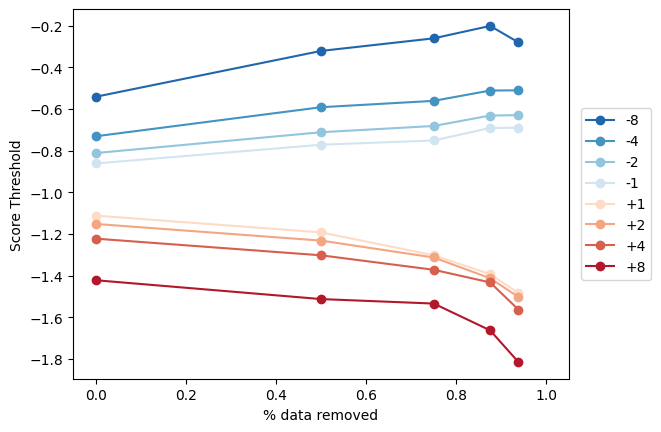

In [62]:
for i,(point, thresholds) in list(enumerate(zip([1,2,4,8],np.stack(TauB).T)))[::-1]:
    plt.plot(1-data['proportions'][:len(TauB)],thresholds,label=f"-{point}",marker='o',color=codes[3-i])

for j,(point, thresholds) in enumerate(zip([1,2,4,8],np.stack(TauP).T),start=4):
    plt.plot(1-data['proportions'][:len(TauP)],thresholds,label=f"+{point}",marker='o',color=codes[j])

plt.legend(loc='center right',bbox_to_anchor=(1.18,0.5))
plt.xlabel("% data removed")
plt.ylabel("Score Threshold")
plt.xlim(-.05,1.05)
plt.savefig("/data/dzeiberg/mave_calibration/Findlay_BRCA1_SGE_pipeline_B_downsample_experiment.png",bbox_inches='tight',dpi=300)

Text(0, 0.5, 'Threshold')

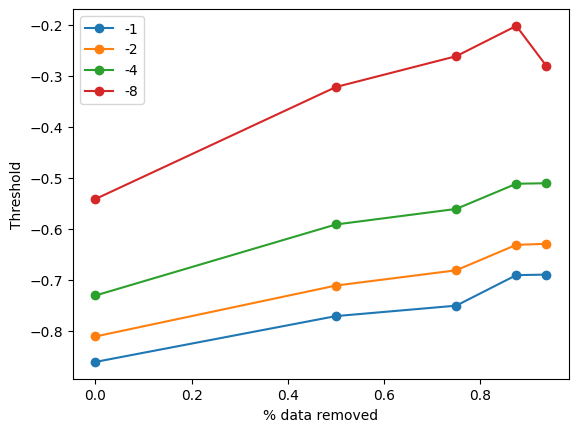

In [29]:

plt.legend()
plt.xlabel("% data removed")
plt.ylabel("Threshold")

In [ ]:
iter_fits[0]['component_params']

In [ ]:
fits[0][0]['weights']

In [ ]:
fits[-1][0]['weights']